In [177]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [178]:
## Reading in the data
df = pd.read_csv('train.csv')

## Dimensions of the data
df.shape

(1460, 81)

In [179]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [180]:
## Percentage of null values in each column, having nulls
mis_feat = [feature for feature in df.columns if df[feature].isnull().sum()>0]

for feature in mis_feat:
    print(feature,"has {}% missing values".format(round(100*(df[feature].isnull().mean()),2)), ".... The DataType is ", df[feature].dtypes)

LotFrontage has 17.74% missing values .... The DataType is  float64
Alley has 93.77% missing values .... The DataType is  object
MasVnrType has 0.55% missing values .... The DataType is  object
MasVnrArea has 0.55% missing values .... The DataType is  float64
BsmtQual has 2.53% missing values .... The DataType is  object
BsmtCond has 2.53% missing values .... The DataType is  object
BsmtExposure has 2.6% missing values .... The DataType is  object
BsmtFinType1 has 2.53% missing values .... The DataType is  object
BsmtFinType2 has 2.6% missing values .... The DataType is  object
Electrical has 0.07% missing values .... The DataType is  object
FireplaceQu has 47.26% missing values .... The DataType is  object
GarageType has 5.55% missing values .... The DataType is  object
GarageYrBlt has 5.55% missing values .... The DataType is  float64
GarageFinish has 5.55% missing values .... The DataType is  object
GarageQual has 5.55% missing values .... The DataType is  object
GarageCond has 5.55

#### This is understood that some columns represent NA's for 'None', but this doesn't affect my approach as I have imputed all nulls appropriately as per their respective DataTypes with a seperate "Missing" category for categorical DataType equating to "None" etc...

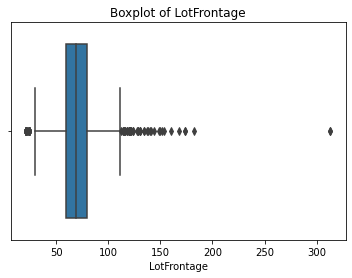

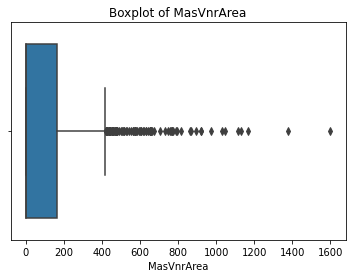

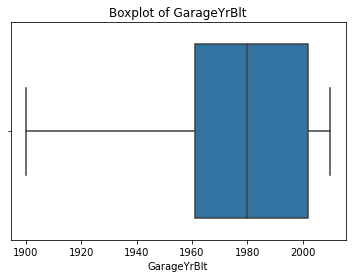

In [181]:
## Checking if the missing numeric features have outlier presence
for feature in ["LotFrontage","MasVnrArea","GarageYrBlt"]:
    sns.boxplot(x ="{}".format(feature), data=df)
    plt.title("Boxplot of {}".format(feature))
    plt.show()

In [182]:
## NUmber of houses with no garages
len(df[df['GarageType'].isnull()])

81

- The Numerical features are biased with outlier presence and the GarageYear feature isn't centered around mean as well. Hence, all this points to them being imputed with their respective medians.<br>
- While, other features are categorical in nature, and therefore, will be imputed with a seperate "Missing" category.<br>
- Now, as is visible in the percentage missing, all the "Garage" features are missing exactly the same values with "GarageArea" = 0, this implies that these 81 (as is shown in the above cell) houses don't have Garages, which is fine for the Categorical Features as they will be imputed with "Missing", but creates a hindrance for "GarageYrBlt" feature as it cannot be left Null, nor I can remove 81 rows out of already sparse data, neither can I put 0 as it will later be engineered as something else. So, the only option in site is to impute them with median, however, there can be better approaches for this.<br>

In [183]:
mis_feat_num = ["LotFrontage", "MasVnrArea",'GarageYrBlt']

## Imputing Numeric features
for feature in mis_feat_num:
    df[feature] = df[feature].fillna(int(df[feature].median()))

In [184]:
## Categorical Missing features
mis_feat_cat = [feature for feature in mis_feat if df[feature].dtypes=='O']
        
print(mis_feat_cat, end=',')

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],

In [185]:
## Imputing missing Categorical Features with "Missing"
for feature in mis_feat_cat:
    df[feature] = df[feature].fillna("Missing")

In [186]:
## Checking to see if all the missing values are dealt with
[feature for feature in df.columns if df[feature].isnull().sum()>0]

[]

#### Missing Values are dealt with, Now moving Onto treating Categorical Features

In [187]:
## But, firstly making a copy of the DataFrame to work upon
df2 = df.copy()
df2.drop('Id',1,inplace=True)## Dropping Id

In [188]:
df2.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7    

In [189]:
## Categorical Features
cat_feat = [feature for feature in df2.columns if len(df2[feature].unique())<=25 and feature not in ['LowQualFinSF',
 '3SsnPorch','PoolArea','YrSold']]
print(cat_feat, end=",")

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition'],

In [190]:
## Year Features
year_feat = [feature for feature in df2.columns if "Year" in feature or "Yr" in feature]
year_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [191]:
## Numerical features
num_feat = [feature for feature in df2.columns if df2[feature].dtypes!="O" and feature not in cat_feat and feature not in year_feat]
print(num_feat,end=',')

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice'],

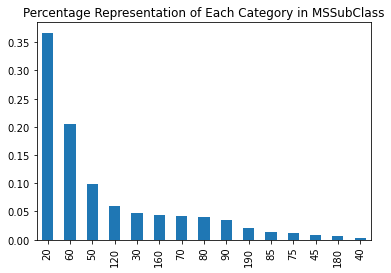

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


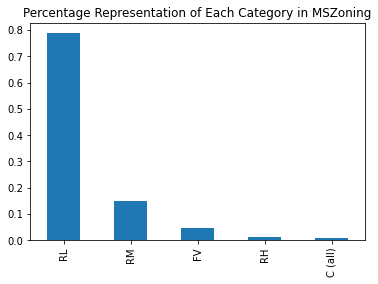

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


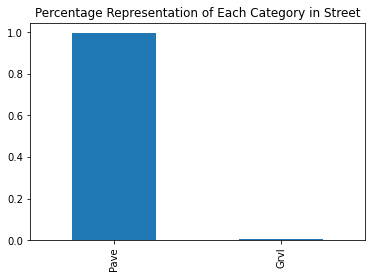

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


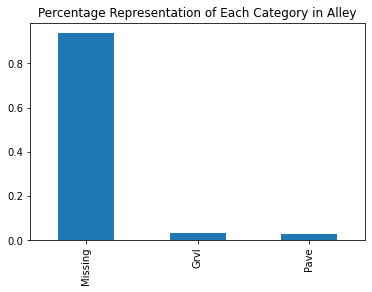

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


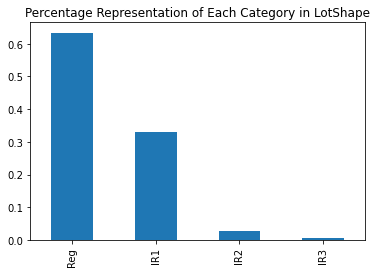

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


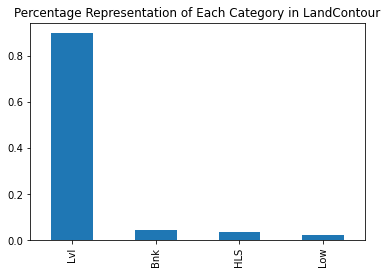

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


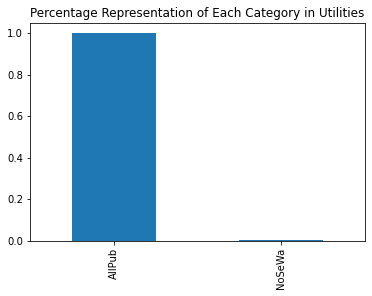

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


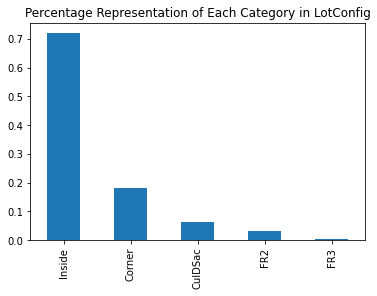

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


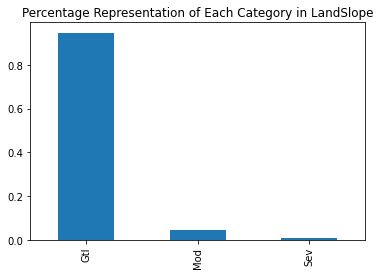

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


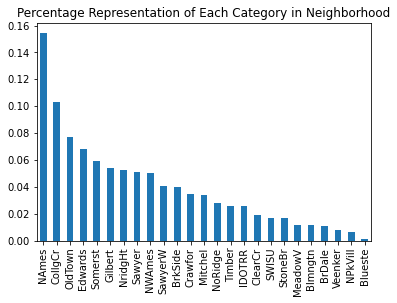

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


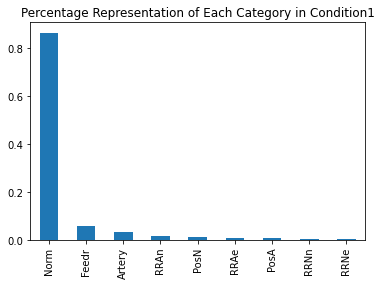

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


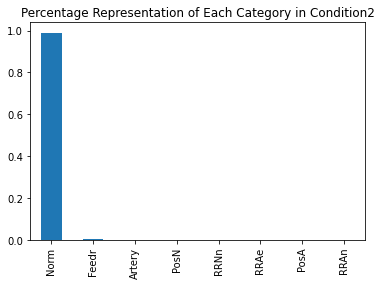

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


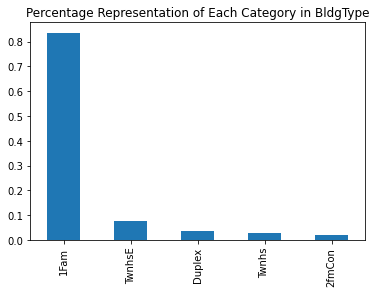

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


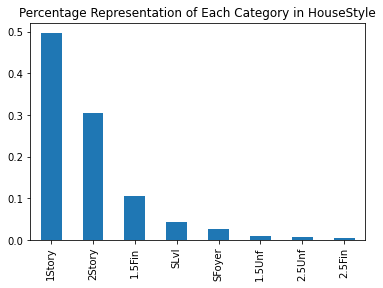

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


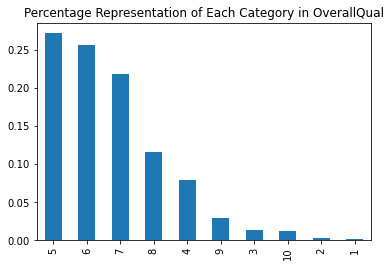

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


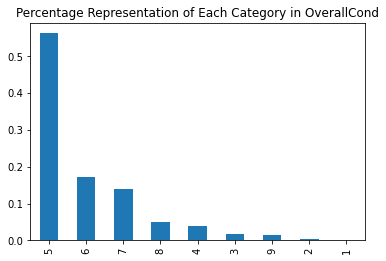

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


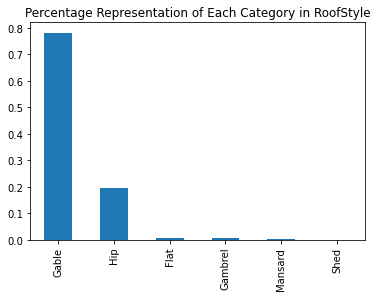

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


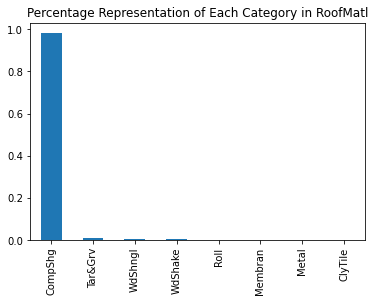

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


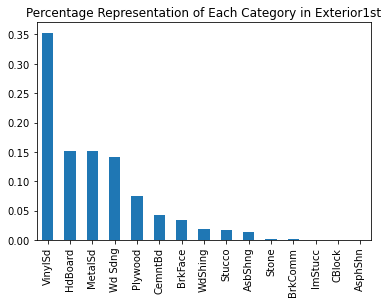

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


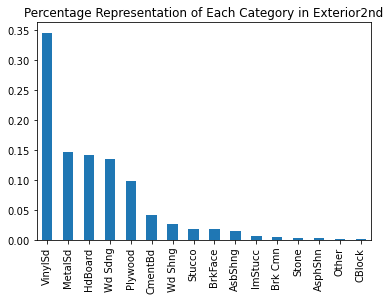

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


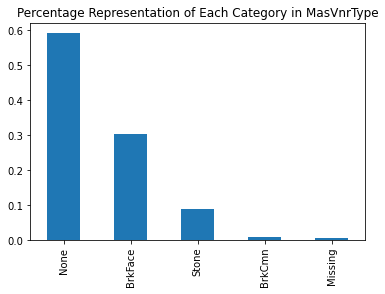

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


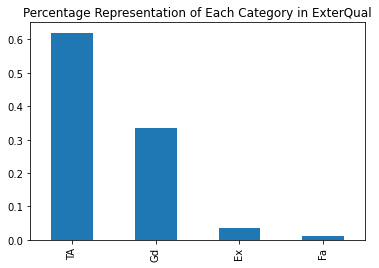

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


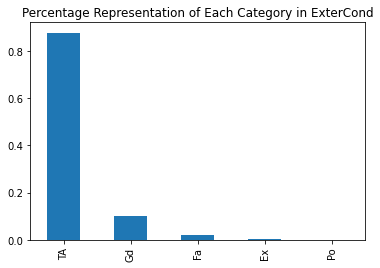

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


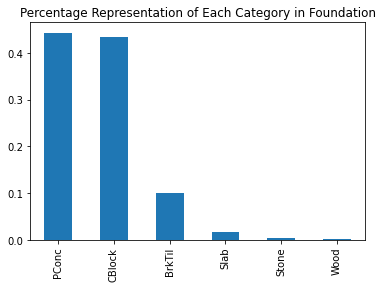

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


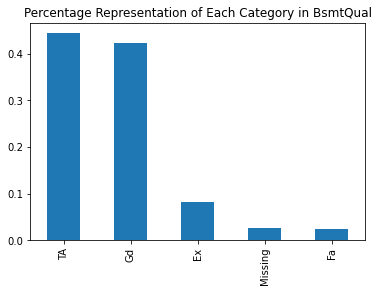

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


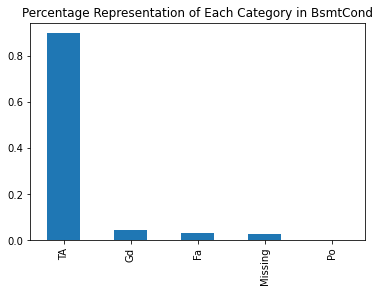

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


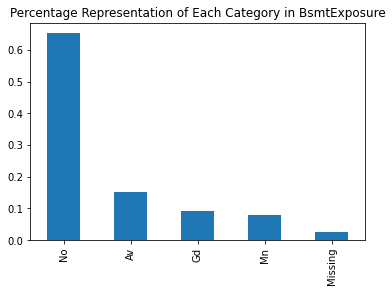

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


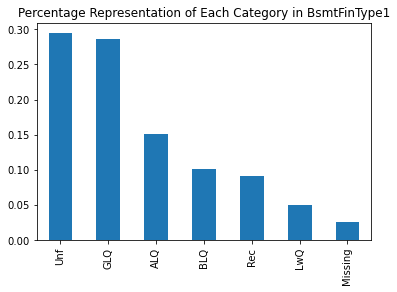

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


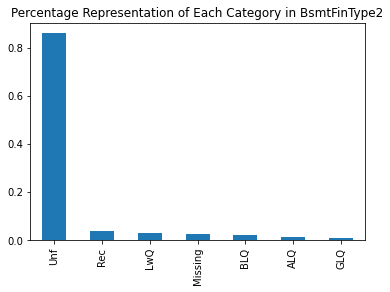

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


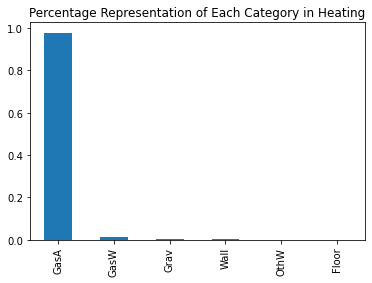

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


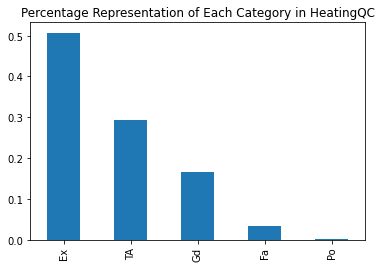

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


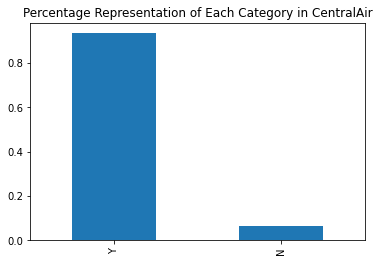

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


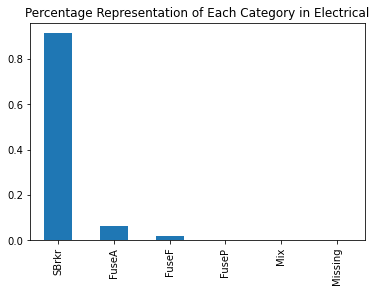

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


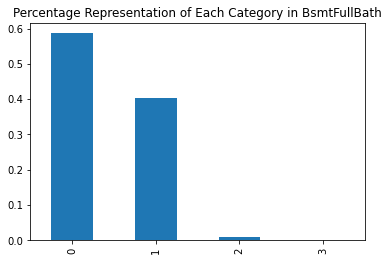

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


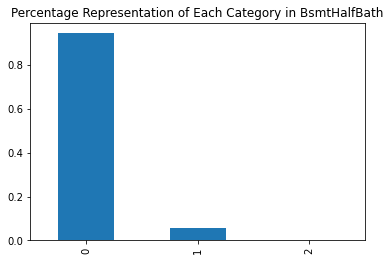

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


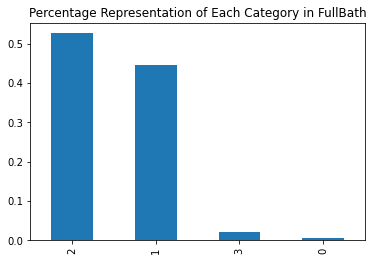

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


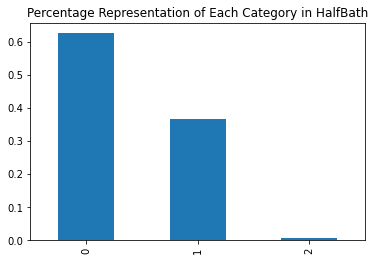

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


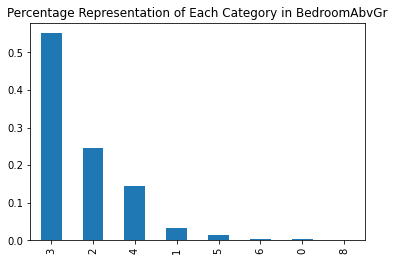

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


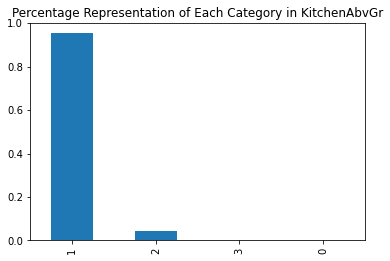

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


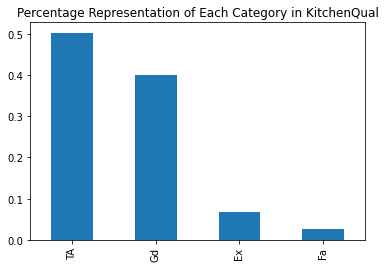

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


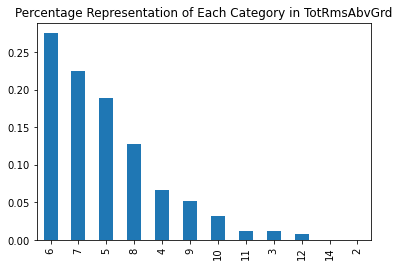

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


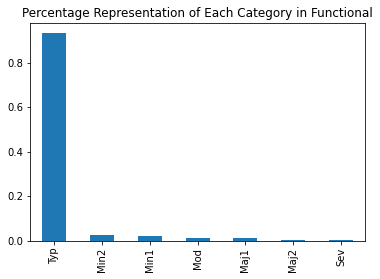

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


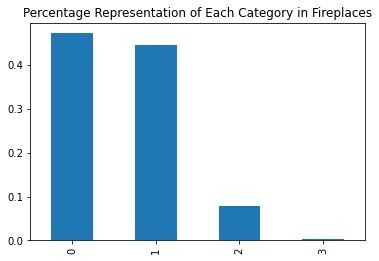

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


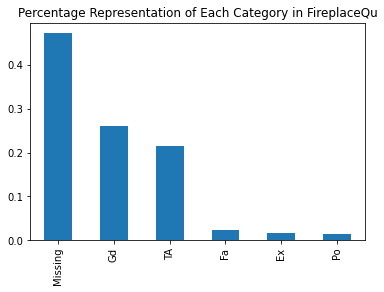

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


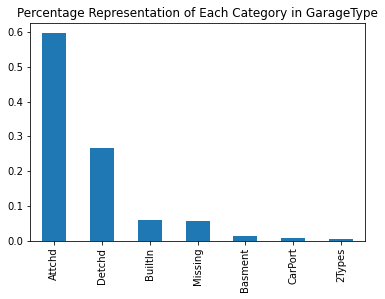

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


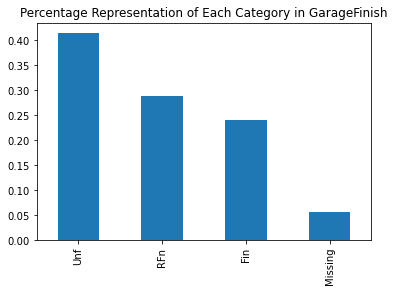

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


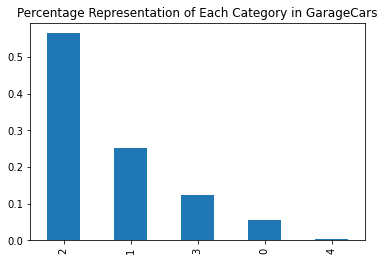

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


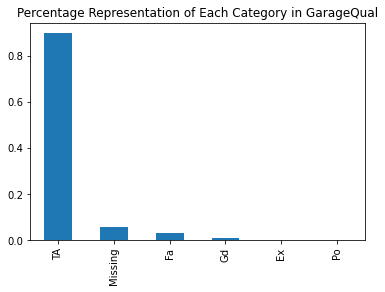

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


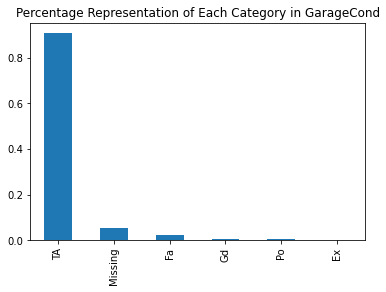

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


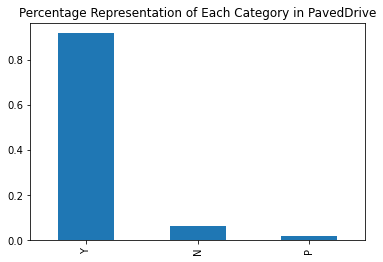

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


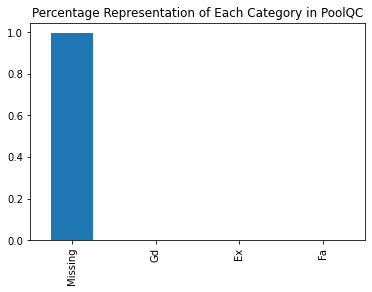

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


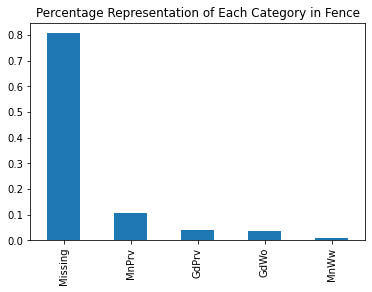

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


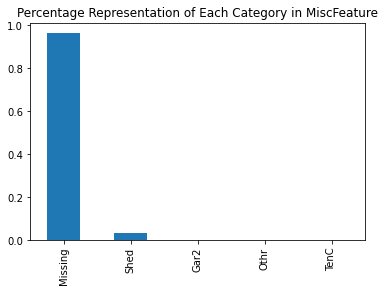

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


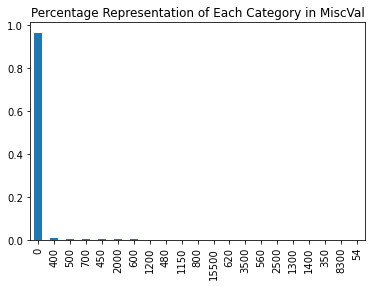

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


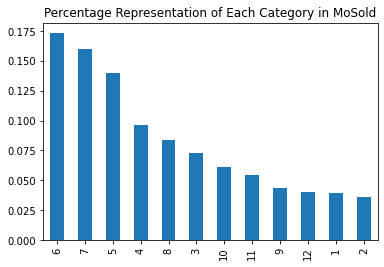

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


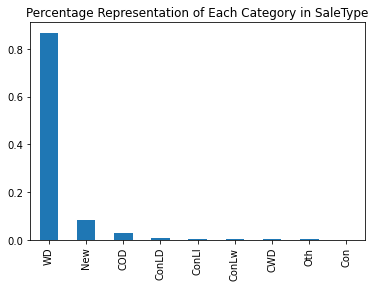

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


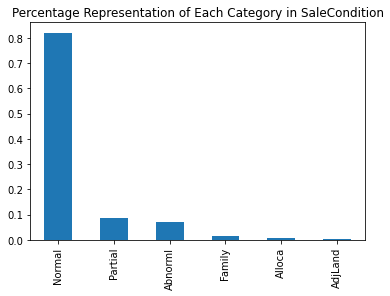

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [192]:
## Visualizations for each categorical features
for feature in cat_feat:
    df2[feature].value_counts(normalize = True).plot.bar()
    plt.title("Percentage Representation of Each Category in {}".format(feature))
    plt.show()
    print("Z"*120)

In [193]:
## Number of different categories in each categorical column
dum = []
for feature in cat_feat:
    print(feature, "has {} different categories".format(len(df2[feature].unique())))
    dum.append(len(df2[feature].unique()))

MSSubClass has 15 different categories
MSZoning has 5 different categories
Street has 2 different categories
Alley has 3 different categories
LotShape has 4 different categories
LandContour has 4 different categories
Utilities has 2 different categories
LotConfig has 5 different categories
LandSlope has 3 different categories
Neighborhood has 25 different categories
Condition1 has 9 different categories
Condition2 has 8 different categories
BldgType has 5 different categories
HouseStyle has 8 different categories
OverallQual has 10 different categories
OverallCond has 9 different categories
RoofStyle has 6 different categories
RoofMatl has 8 different categories
Exterior1st has 15 different categories
Exterior2nd has 16 different categories
MasVnrType has 5 different categories
ExterQual has 4 different categories
ExterCond has 5 different categories
Foundation has 6 different categories
BsmtQual has 5 different categories
BsmtCond has 5 different categories
BsmtExposure has 5 differen

In [194]:
print("Dummifying right now will create {} total columns".format(sum(dum)-len(cat_feat)+len(num_feat)+len(year_feat)))

Dummifying right now will create 348 total columns


#### The above statement poses yet another problem... This can be tackled with LabelEncoders, but not all categorical features have an innate order (hierarchy) within them. <br>
#### Hence, I'll be clubbing categories with less than 5% representation into a single category "rare_val" for each attribute. (Binning unimportant categories as one)

In [195]:
for feature in cat_feat:
    t = df2.groupby(feature)['SalePrice'].count()/len(df2)  ## Counting Each feature and finding out its percentage
    t2 = t[t.values<0.05].index                             ## Selecting the features with less representation
    df2[feature] = np.where(df2[feature].isin(t2),'rare_val',df2[feature])  ## Converting

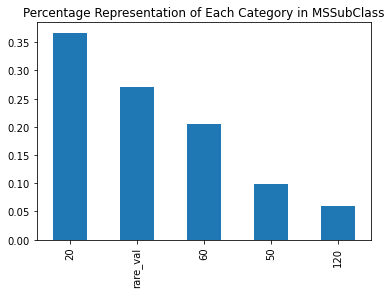

________________________________________________________________________________________________________________________


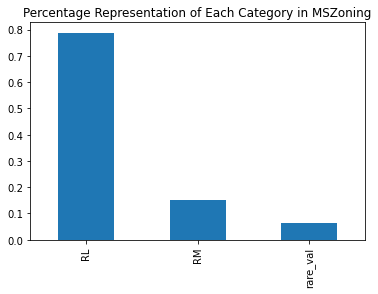

________________________________________________________________________________________________________________________


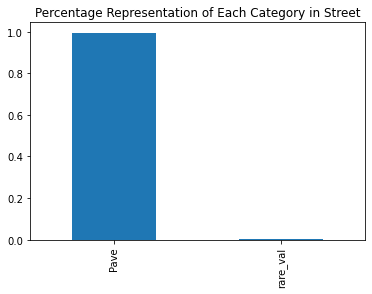

________________________________________________________________________________________________________________________


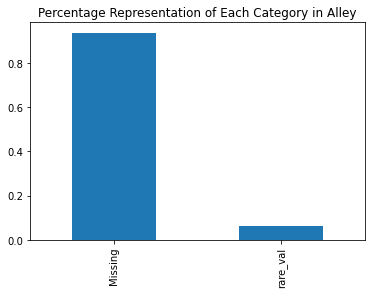

________________________________________________________________________________________________________________________


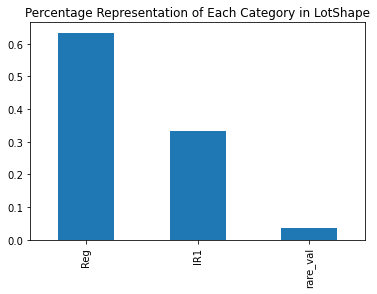

________________________________________________________________________________________________________________________


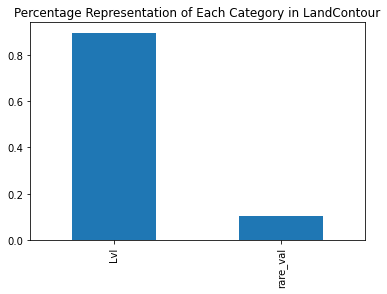

________________________________________________________________________________________________________________________


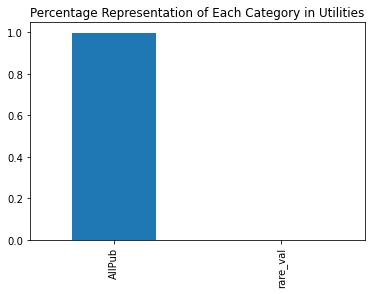

________________________________________________________________________________________________________________________


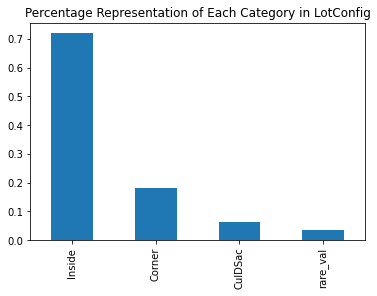

________________________________________________________________________________________________________________________


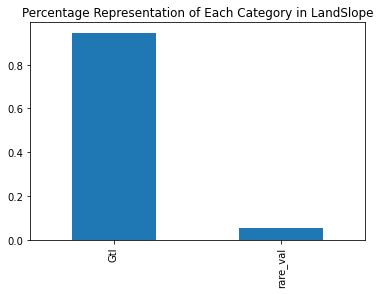

________________________________________________________________________________________________________________________


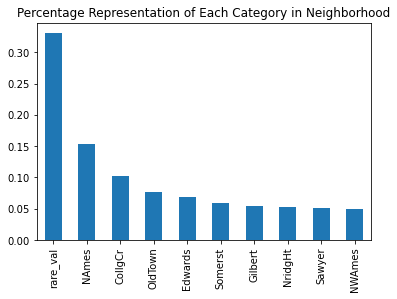

________________________________________________________________________________________________________________________


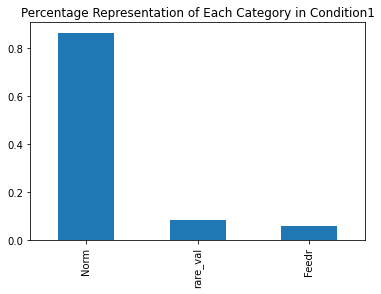

________________________________________________________________________________________________________________________


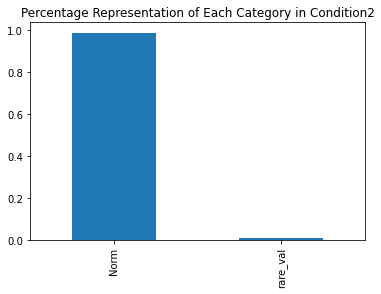

________________________________________________________________________________________________________________________


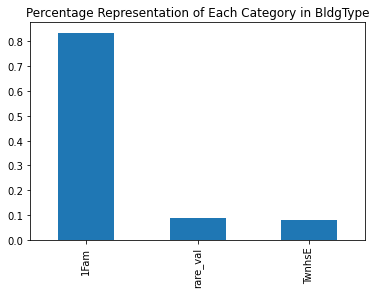

________________________________________________________________________________________________________________________


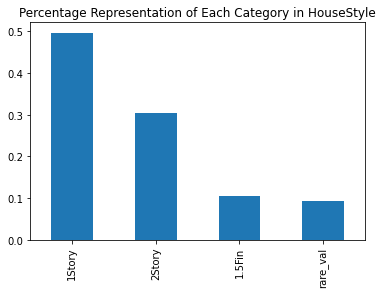

________________________________________________________________________________________________________________________


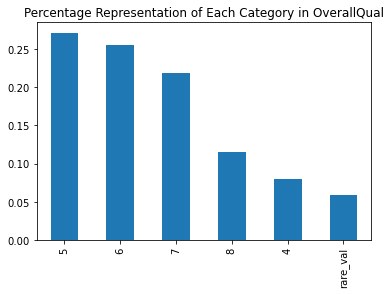

________________________________________________________________________________________________________________________


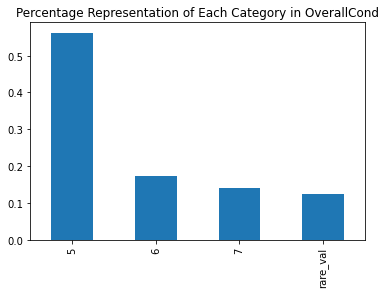

________________________________________________________________________________________________________________________


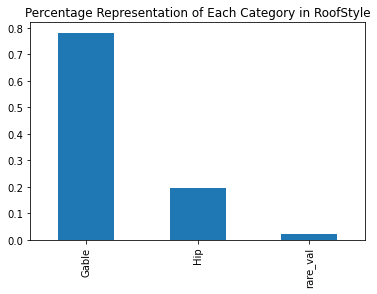

________________________________________________________________________________________________________________________


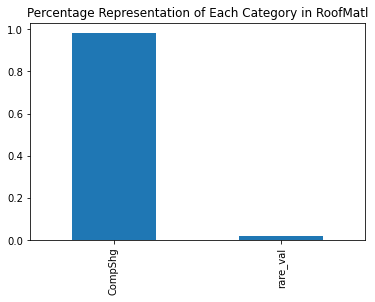

________________________________________________________________________________________________________________________


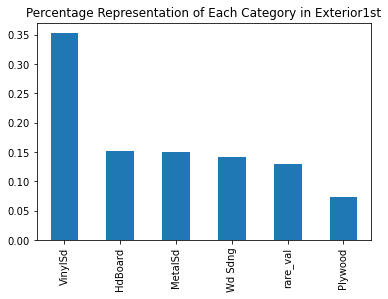

________________________________________________________________________________________________________________________


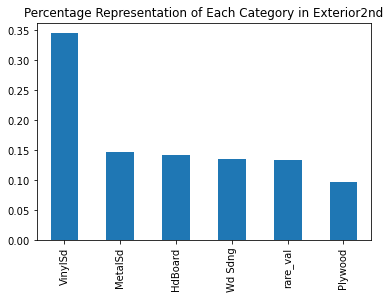

________________________________________________________________________________________________________________________


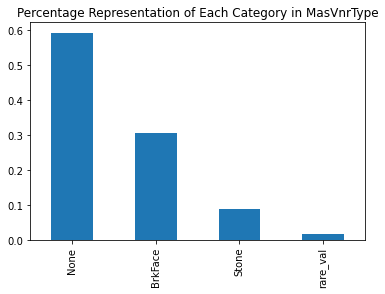

________________________________________________________________________________________________________________________


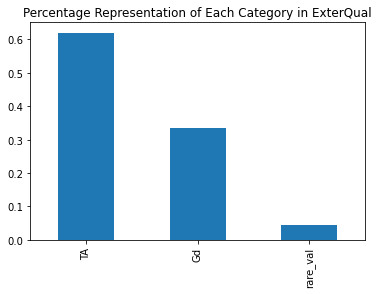

________________________________________________________________________________________________________________________


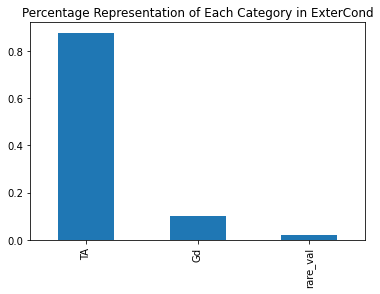

________________________________________________________________________________________________________________________


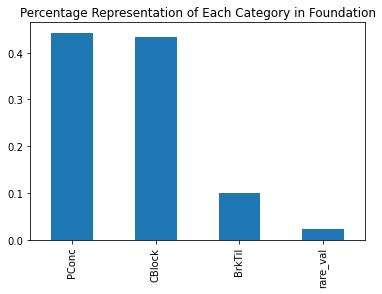

________________________________________________________________________________________________________________________


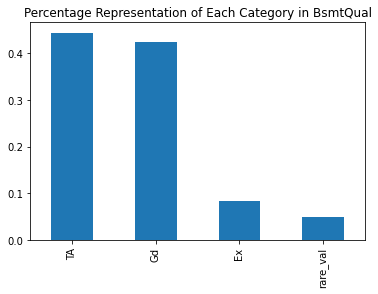

________________________________________________________________________________________________________________________


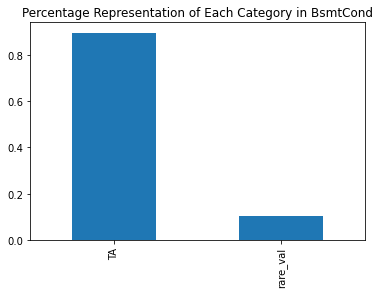

________________________________________________________________________________________________________________________


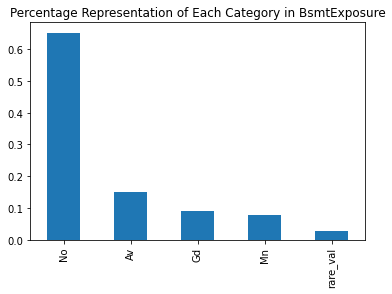

________________________________________________________________________________________________________________________


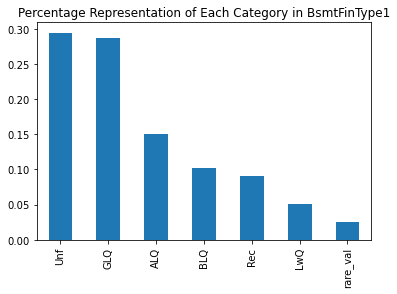

________________________________________________________________________________________________________________________


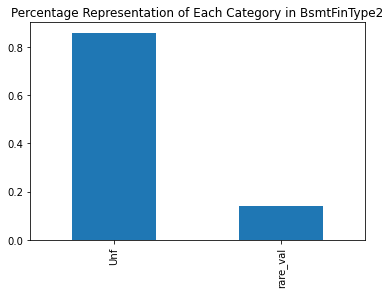

________________________________________________________________________________________________________________________


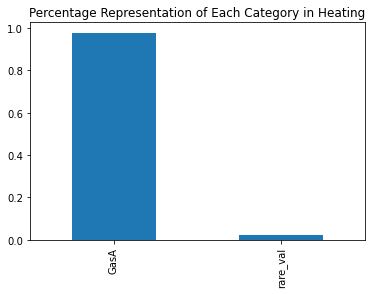

________________________________________________________________________________________________________________________


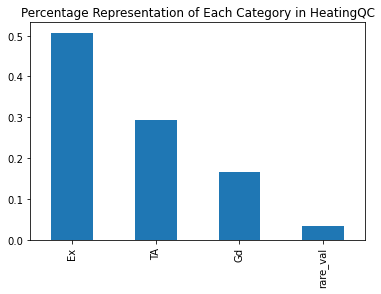

________________________________________________________________________________________________________________________


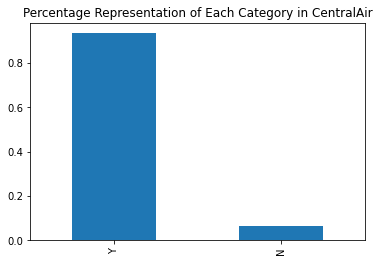

________________________________________________________________________________________________________________________


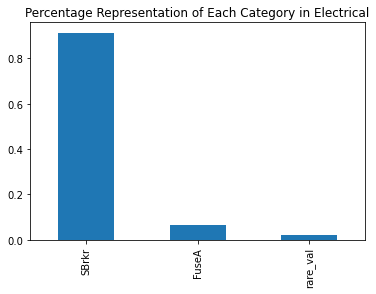

________________________________________________________________________________________________________________________


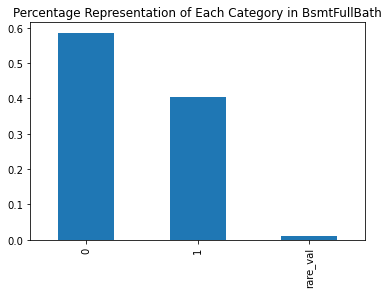

________________________________________________________________________________________________________________________


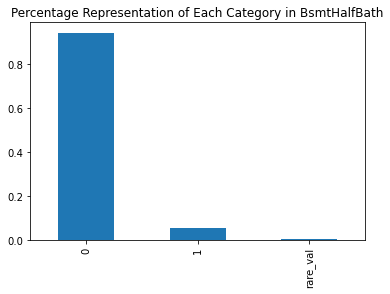

________________________________________________________________________________________________________________________


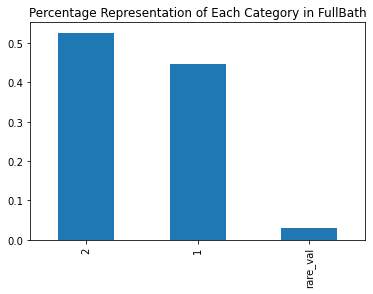

________________________________________________________________________________________________________________________


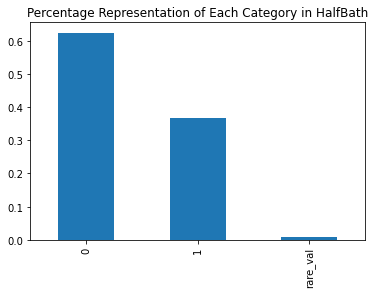

________________________________________________________________________________________________________________________


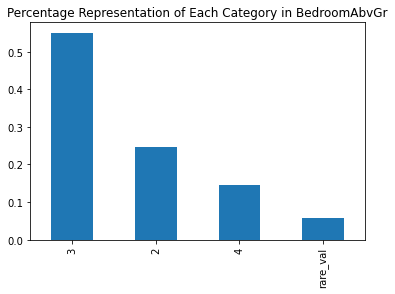

________________________________________________________________________________________________________________________


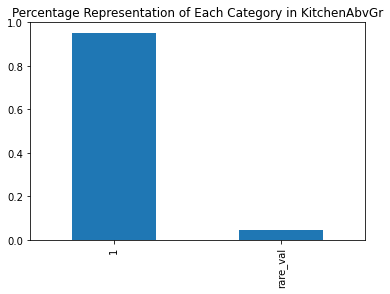

________________________________________________________________________________________________________________________


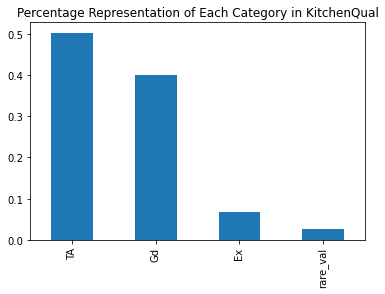

________________________________________________________________________________________________________________________


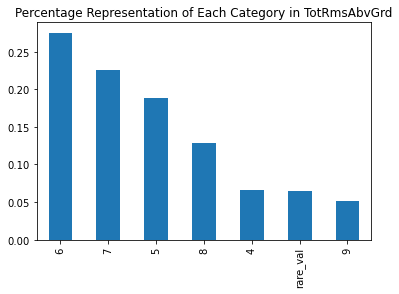

________________________________________________________________________________________________________________________


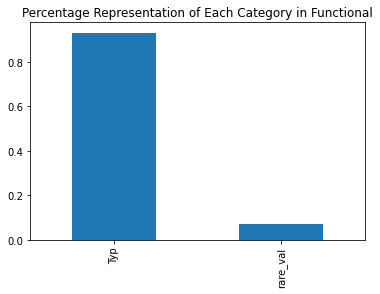

________________________________________________________________________________________________________________________


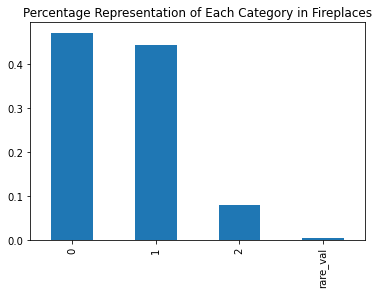

________________________________________________________________________________________________________________________


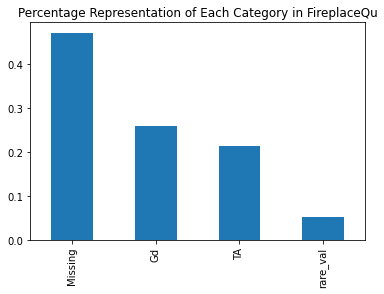

________________________________________________________________________________________________________________________


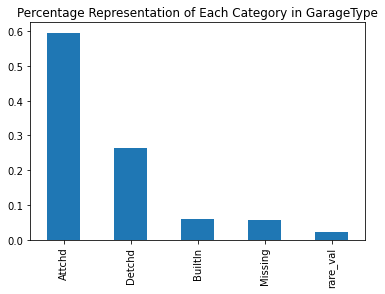

________________________________________________________________________________________________________________________


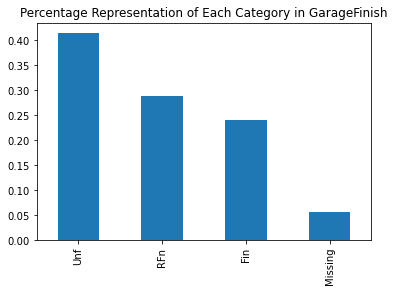

________________________________________________________________________________________________________________________


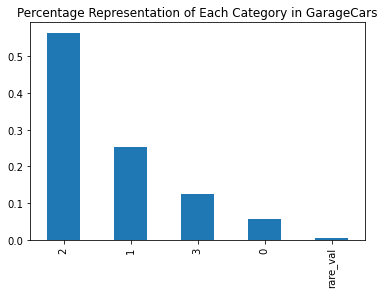

________________________________________________________________________________________________________________________


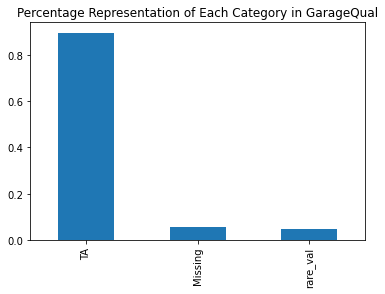

________________________________________________________________________________________________________________________


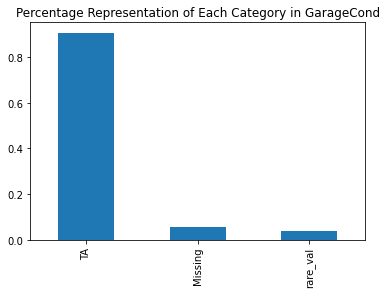

________________________________________________________________________________________________________________________


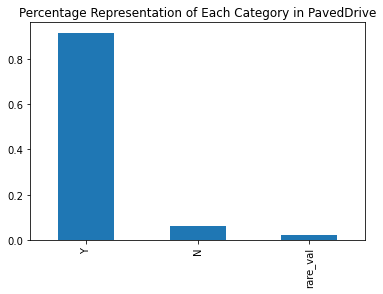

________________________________________________________________________________________________________________________


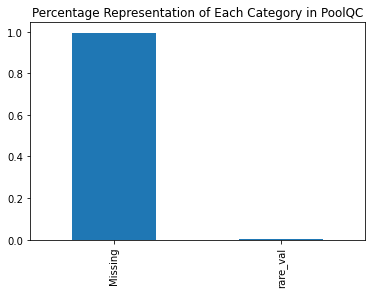

________________________________________________________________________________________________________________________


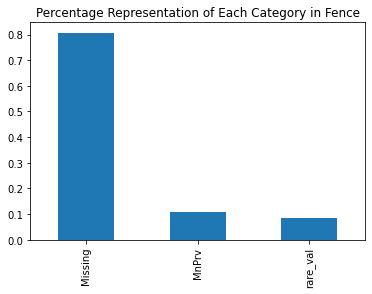

________________________________________________________________________________________________________________________


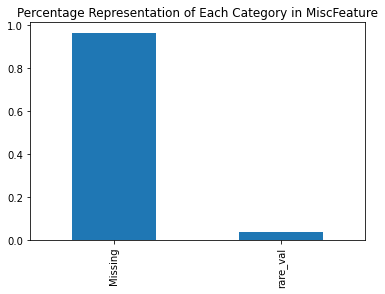

________________________________________________________________________________________________________________________


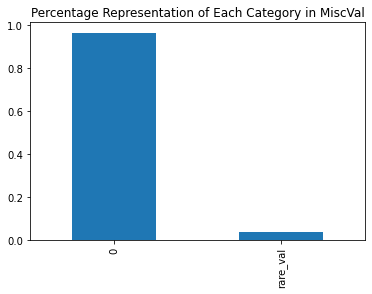

________________________________________________________________________________________________________________________


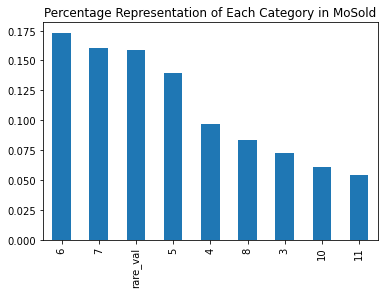

________________________________________________________________________________________________________________________


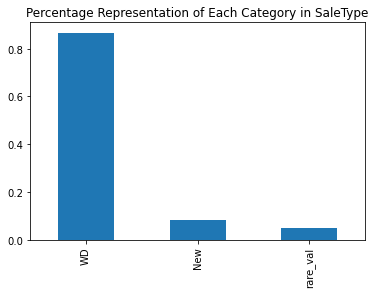

________________________________________________________________________________________________________________________


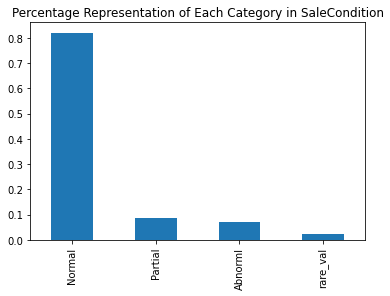

________________________________________________________________________________________________________________________


In [196]:
## Visualizations for each categorical features after rare_val transformation
for feature in cat_feat:
    df2[feature].value_counts(normalize = True).plot.bar()
    plt.title("Percentage Representation of Each Category in {}".format(feature))
    plt.show()
    print("_"*120)

Grouping has worked perfectly

In [197]:
## Checking how many columns will now be created after dummifying
dum2 = []
for feature in cat_feat:
    dum2.append(len(df2[feature].unique()))
print("Now,after 'rare-val' transformation, the total number of columns after dummifying will be ",sum(dum2)-len(cat_feat)+len(num_feat)+len(year_feat))

Now,after 'rare-val' transformation, the total number of columns after dummifying will be  172


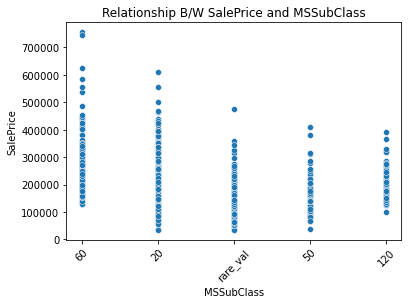

--------------------------------------------------------------------------------------------------------------


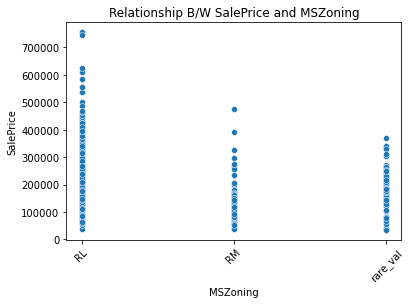

--------------------------------------------------------------------------------------------------------------


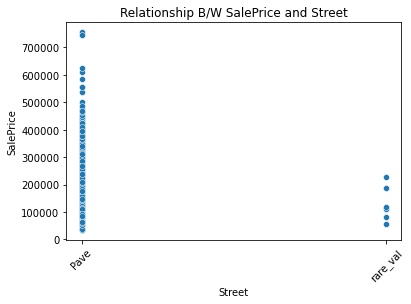

--------------------------------------------------------------------------------------------------------------


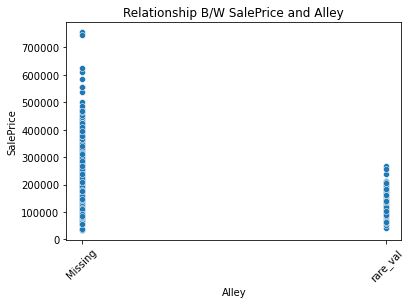

--------------------------------------------------------------------------------------------------------------


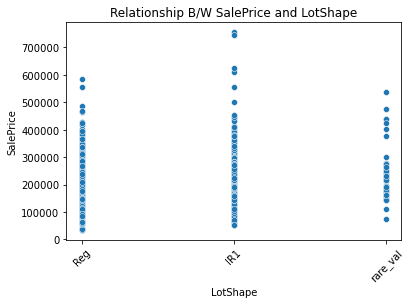

--------------------------------------------------------------------------------------------------------------


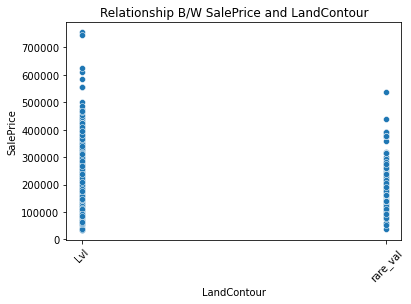

--------------------------------------------------------------------------------------------------------------


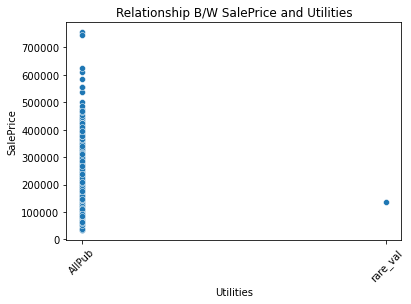

--------------------------------------------------------------------------------------------------------------


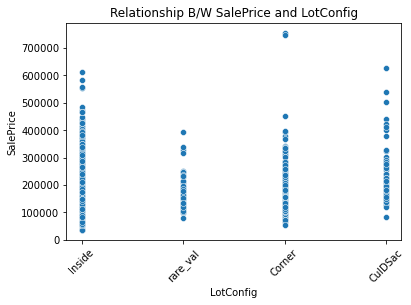

--------------------------------------------------------------------------------------------------------------


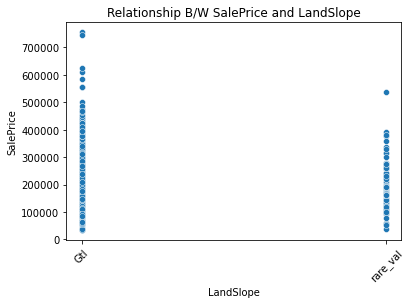

--------------------------------------------------------------------------------------------------------------


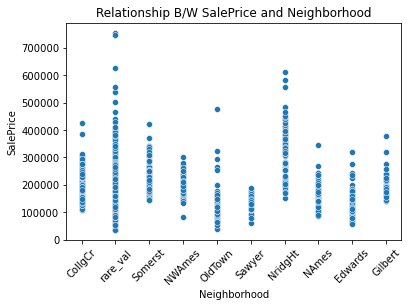

--------------------------------------------------------------------------------------------------------------


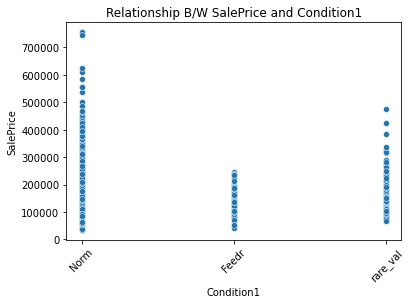

--------------------------------------------------------------------------------------------------------------


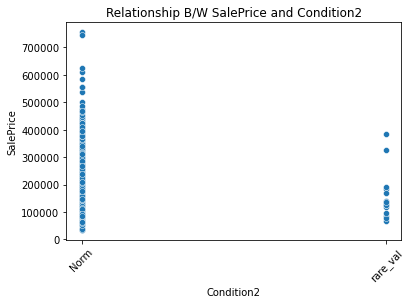

--------------------------------------------------------------------------------------------------------------


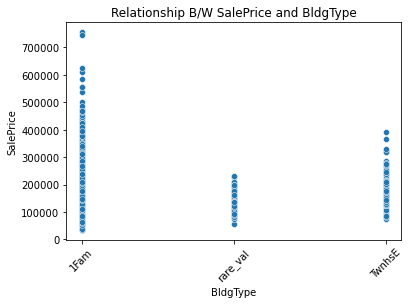

--------------------------------------------------------------------------------------------------------------


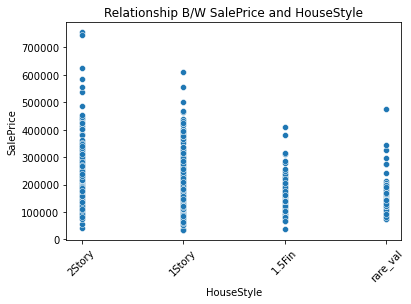

--------------------------------------------------------------------------------------------------------------


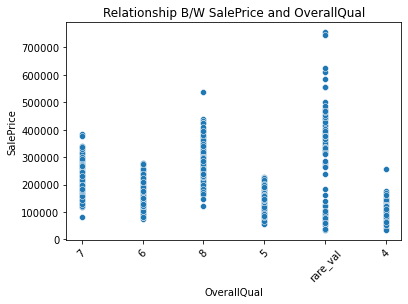

--------------------------------------------------------------------------------------------------------------


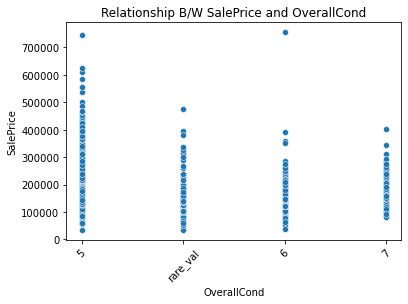

--------------------------------------------------------------------------------------------------------------


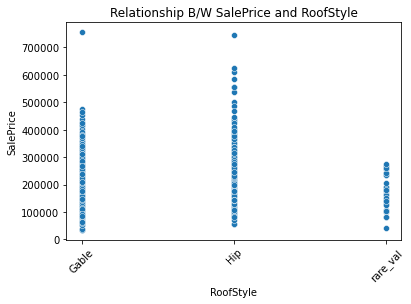

--------------------------------------------------------------------------------------------------------------


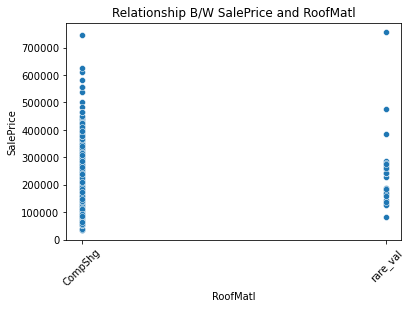

--------------------------------------------------------------------------------------------------------------


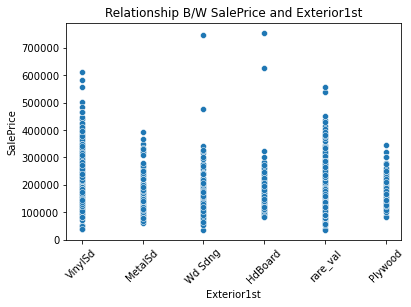

--------------------------------------------------------------------------------------------------------------


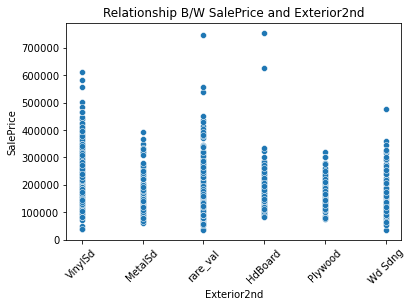

--------------------------------------------------------------------------------------------------------------


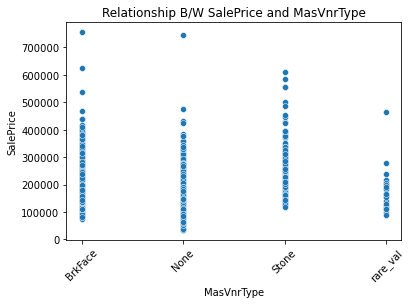

--------------------------------------------------------------------------------------------------------------


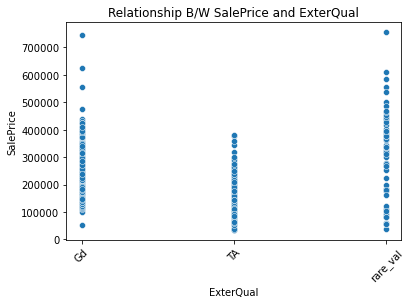

--------------------------------------------------------------------------------------------------------------


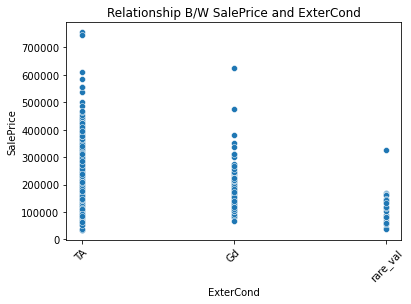

--------------------------------------------------------------------------------------------------------------


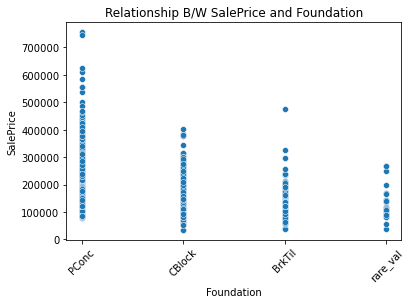

--------------------------------------------------------------------------------------------------------------


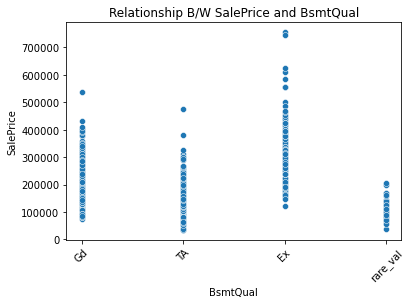

--------------------------------------------------------------------------------------------------------------


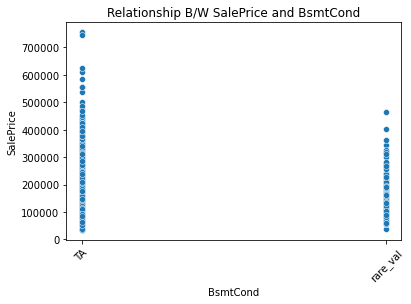

--------------------------------------------------------------------------------------------------------------


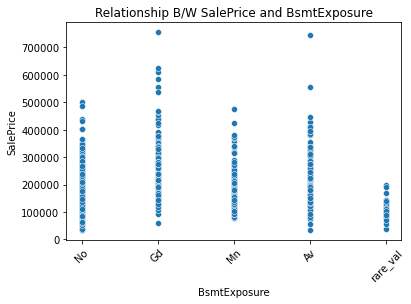

--------------------------------------------------------------------------------------------------------------


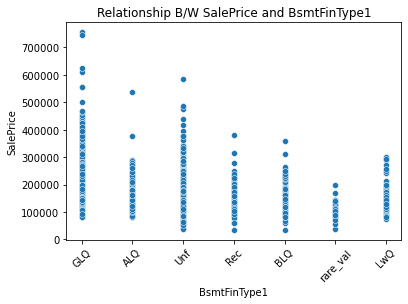

--------------------------------------------------------------------------------------------------------------


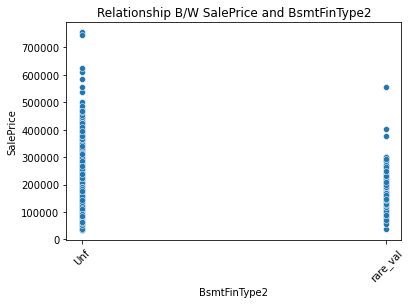

--------------------------------------------------------------------------------------------------------------


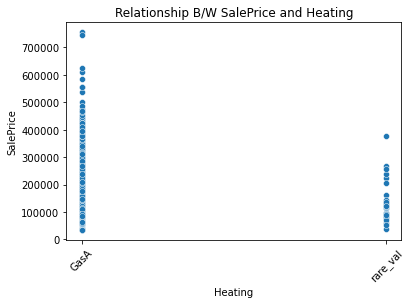

--------------------------------------------------------------------------------------------------------------


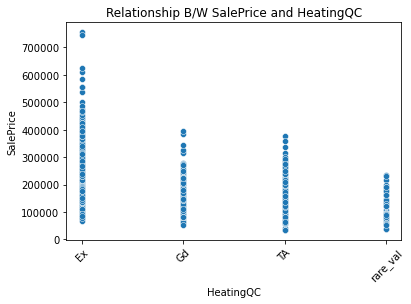

--------------------------------------------------------------------------------------------------------------


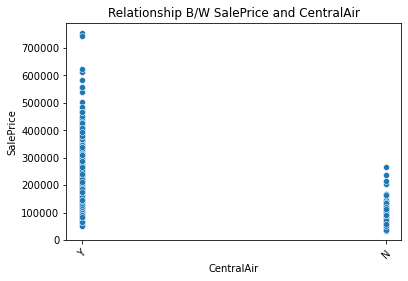

--------------------------------------------------------------------------------------------------------------


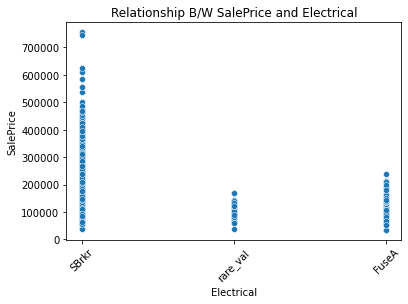

--------------------------------------------------------------------------------------------------------------


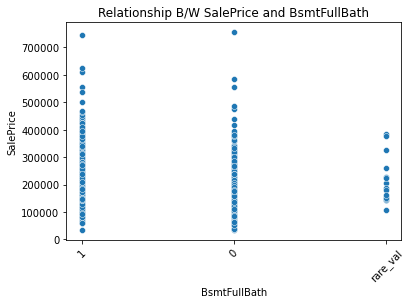

--------------------------------------------------------------------------------------------------------------


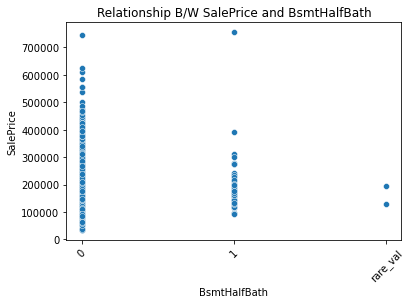

--------------------------------------------------------------------------------------------------------------


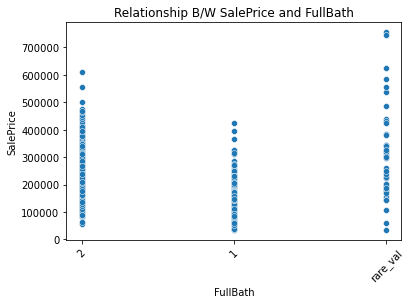

--------------------------------------------------------------------------------------------------------------


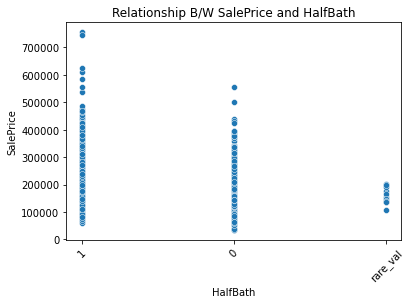

--------------------------------------------------------------------------------------------------------------


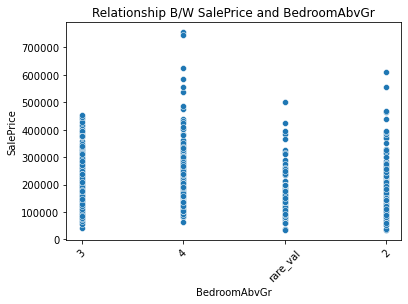

--------------------------------------------------------------------------------------------------------------


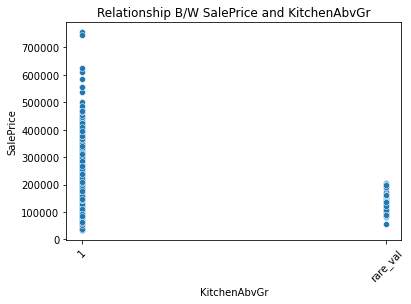

--------------------------------------------------------------------------------------------------------------


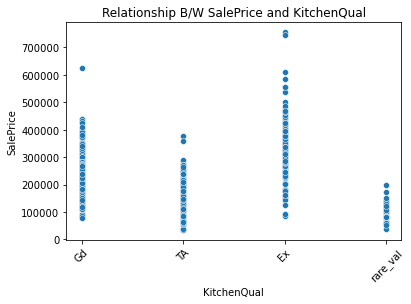

--------------------------------------------------------------------------------------------------------------


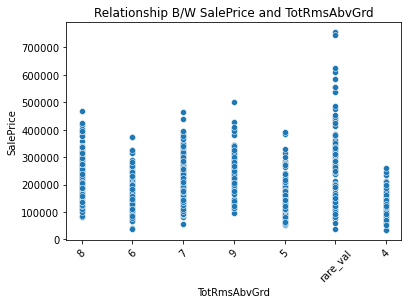

--------------------------------------------------------------------------------------------------------------


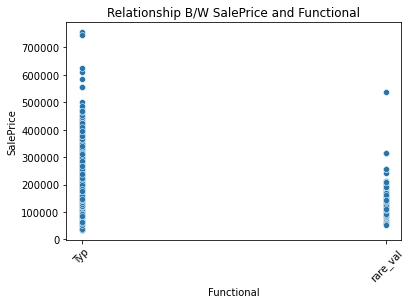

--------------------------------------------------------------------------------------------------------------


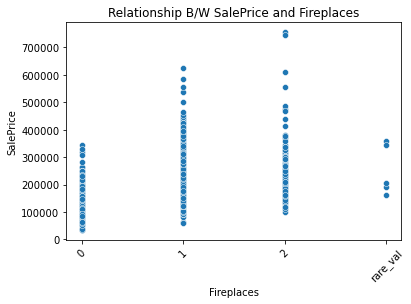

--------------------------------------------------------------------------------------------------------------


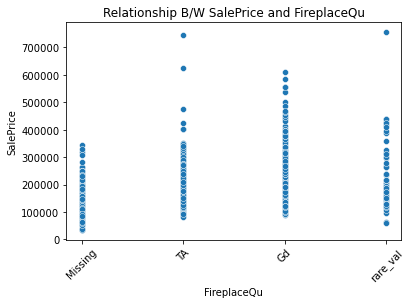

--------------------------------------------------------------------------------------------------------------


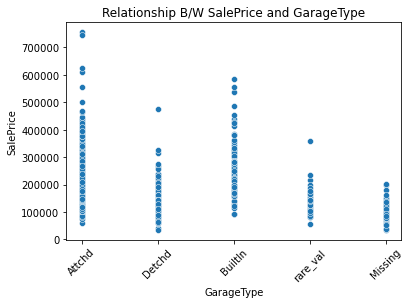

--------------------------------------------------------------------------------------------------------------


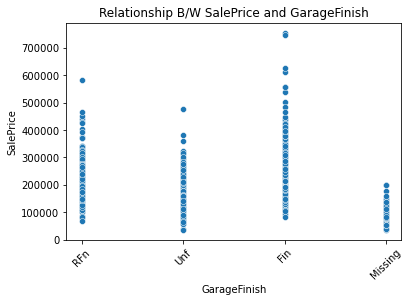

--------------------------------------------------------------------------------------------------------------


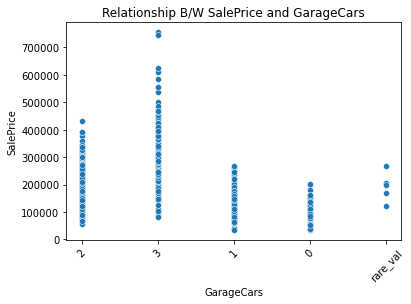

--------------------------------------------------------------------------------------------------------------


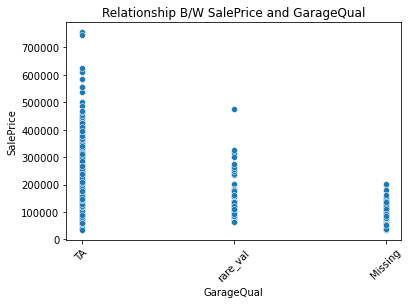

--------------------------------------------------------------------------------------------------------------


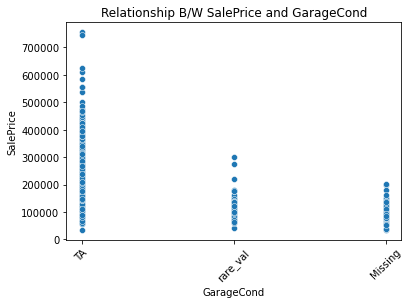

--------------------------------------------------------------------------------------------------------------


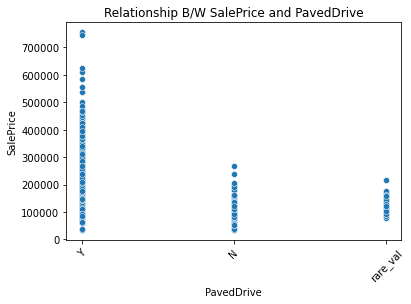

--------------------------------------------------------------------------------------------------------------


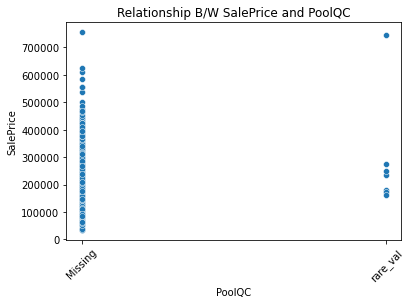

--------------------------------------------------------------------------------------------------------------


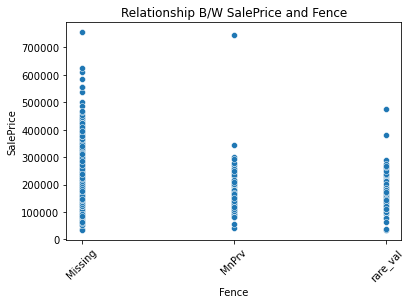

--------------------------------------------------------------------------------------------------------------


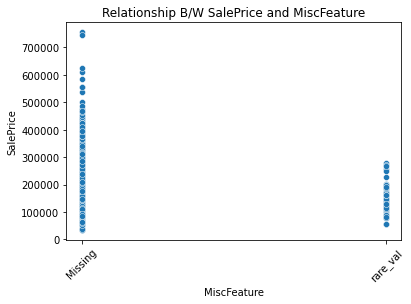

--------------------------------------------------------------------------------------------------------------


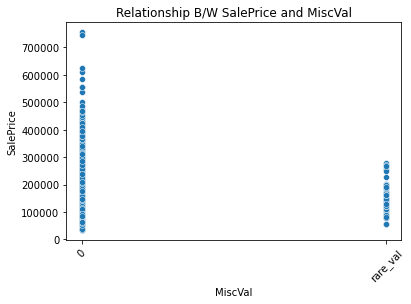

--------------------------------------------------------------------------------------------------------------


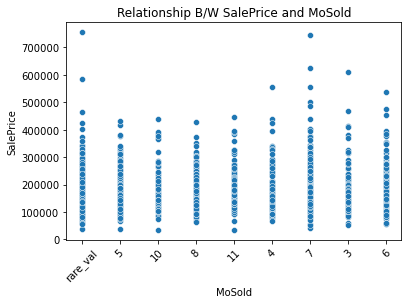

--------------------------------------------------------------------------------------------------------------


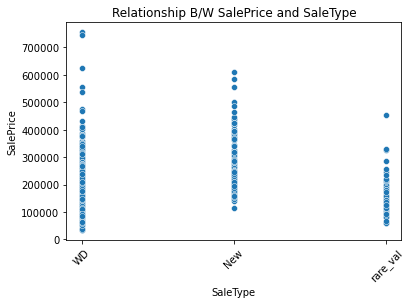

--------------------------------------------------------------------------------------------------------------


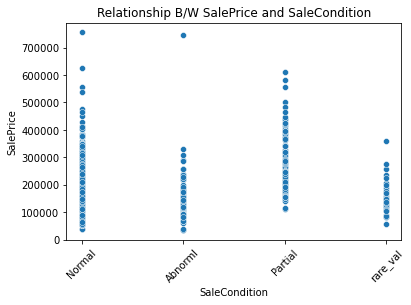

--------------------------------------------------------------------------------------------------------------


In [198]:
## Relationship B/W SalePrice and Categorical Features
for feature in cat_feat:
    sns.scatterplot(data=df2, x=feature, y='SalePrice')
    plt.title("Relationship B/W SalePrice and {}".format(feature))
    plt.xticks(rotation=45)
    plt.show()
    print("-"*110)

#### The above graphs show relationship Between the Target Variable and Different Categorical Features

In [199]:
## Dummifying Categorical Features
dumm_df = pd.get_dummies(df2[cat_feat], drop_first=True)

## Removing Original Features
df2.drop(cat_feat,1,inplace=True)

## Adding dummy columns to original dataframe
df2 = pd.concat([df2,dumm_df], axis = 1)

In [200]:
df2.shape

(1460, 172)

#### The Shape of the new DataFrame matches our estimate

#### Hence, we ended up saving more than 175 columns with minimal loss of information... Checking Year Columns for any problems

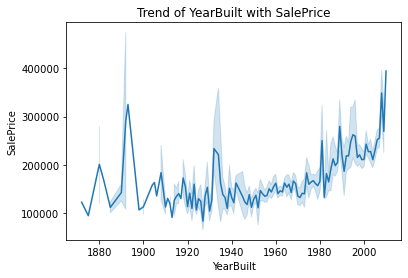

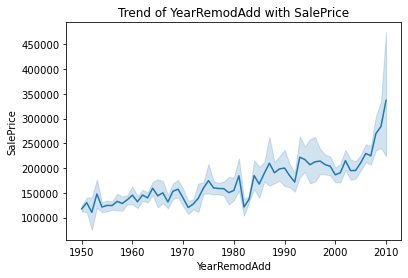

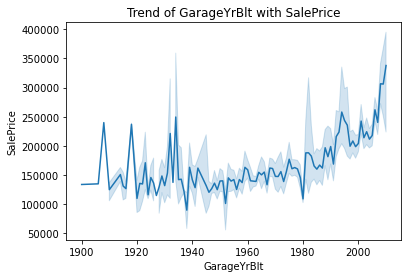

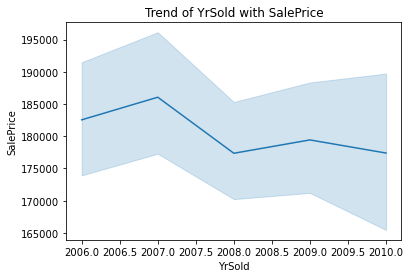

In [201]:
## Now dealing with the Year Features, visualizing trend over the years
for feature in year_feat:
    sns.lineplot(data=df2, x=feature, y="SalePrice")
    plt.title("Trend of {} with SalePrice".format(feature))
    plt.show()

#### The Trend Of SalePrice with the Year is negative, which can only be explained by the 2008 House Market Clash, otherwise immovable property goes up in value with time...

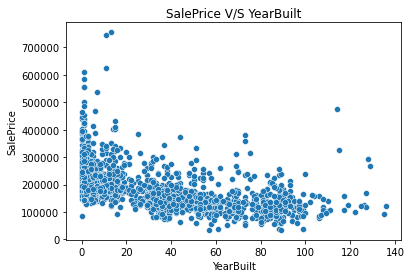

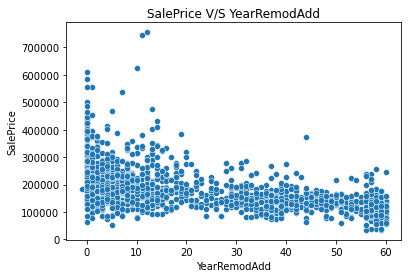

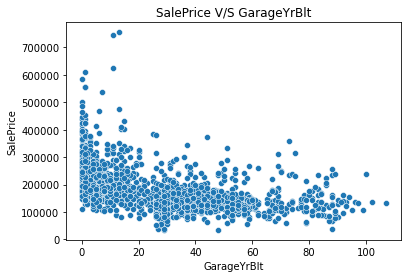

In [202]:
## For this to make sense, I'll substract year features except SaleYear from SaleYear to see the effect of the difference
for feature in year_feat[:-1]:
    df2[feature] = df2['YrSold'] - df2[feature]

for feature in year_feat[:-1]:
    sns.scatterplot(data=df2, x=feature, y='SalePrice')
    plt.title("SalePrice V/S {}".format(feature))
    plt.show()

#### Now, the Year Variables start making sense as more recent the construction the higher is the price and vice versa

#### Moving Onto Numerical Features

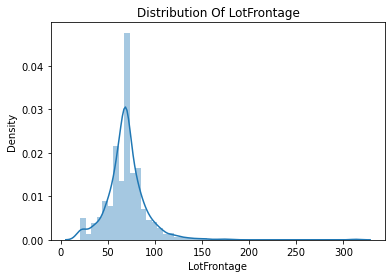

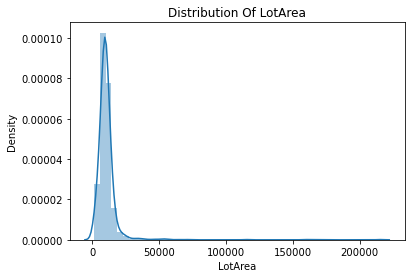

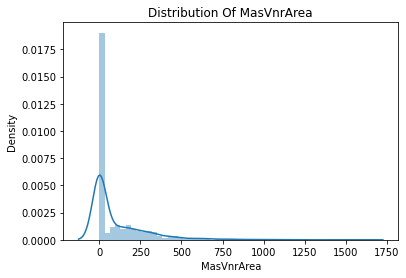

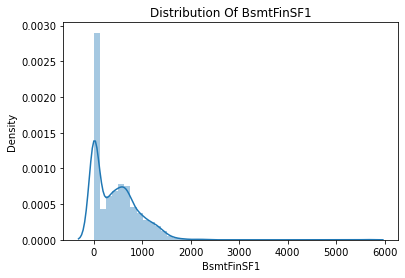

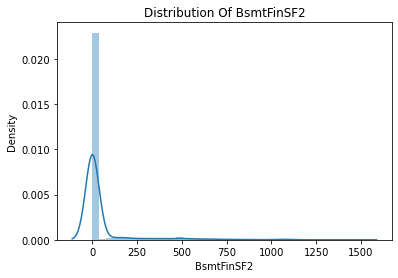

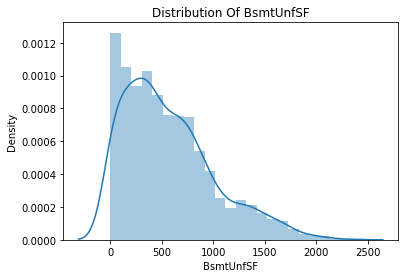

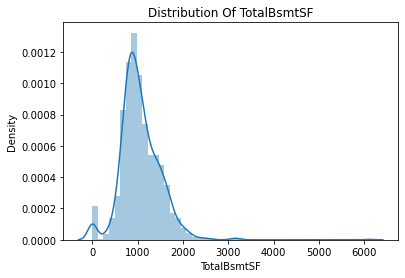

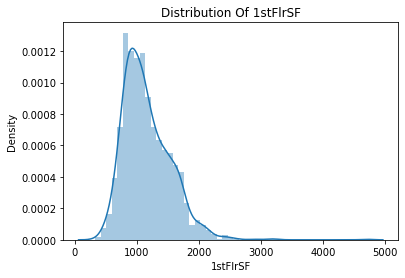

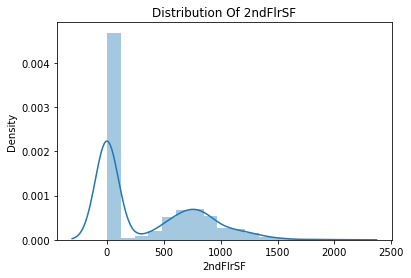

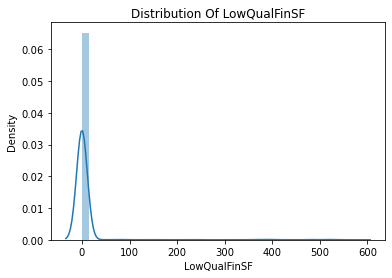

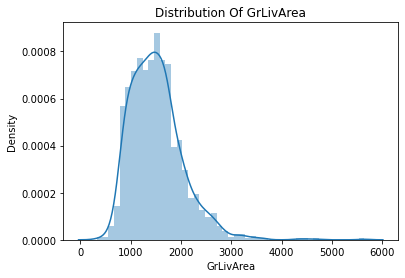

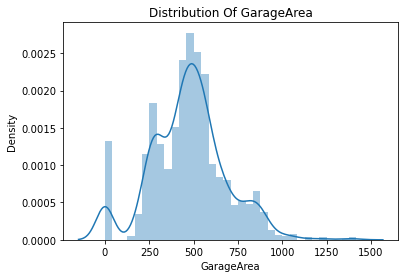

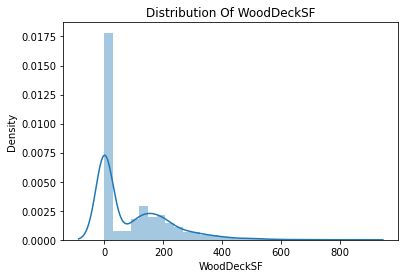

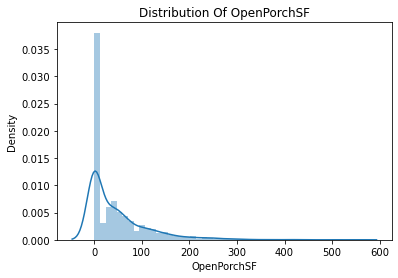

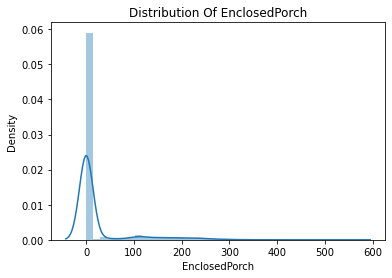

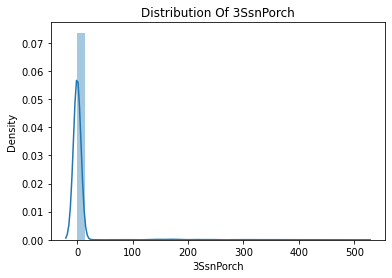

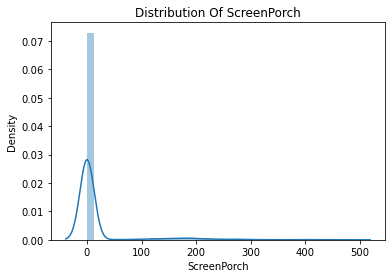

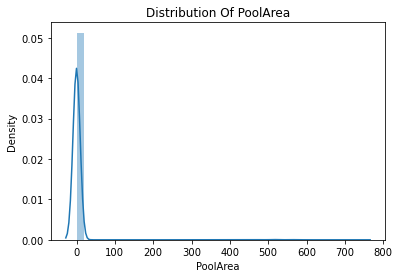

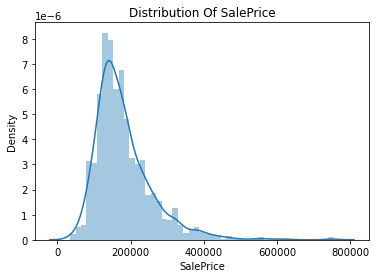

In [203]:
## Distribution of Each Numerical Feature
for feature in num_feat:
    sns.distplot(df[feature])
    plt.title("Distribution Of {}".format(feature))
    plt.show()

Most of the Numerical features are Right Skewed, while those which are not are not Gaussian as well.. Hence, trying to amend that

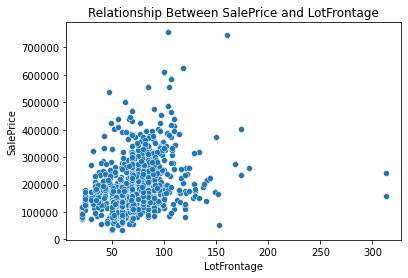

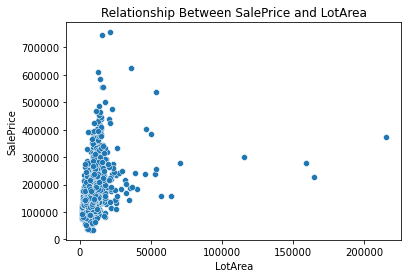

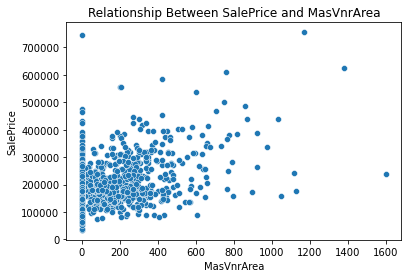

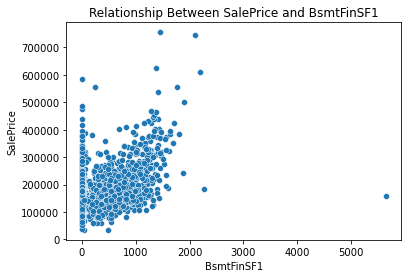

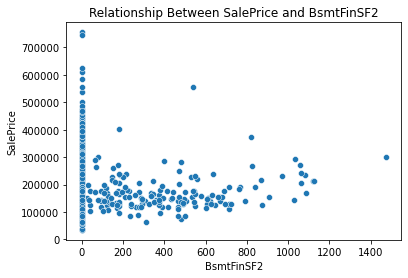

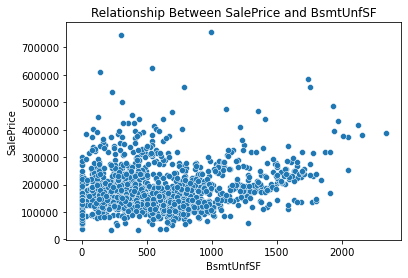

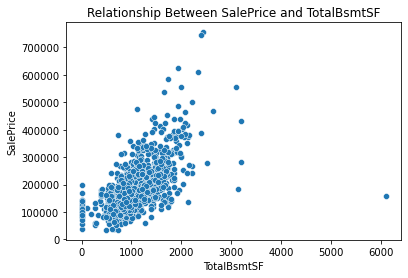

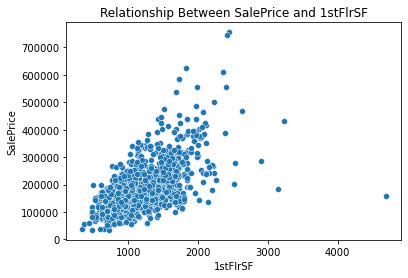

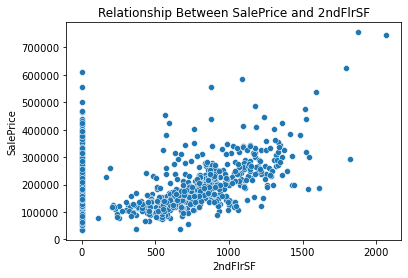

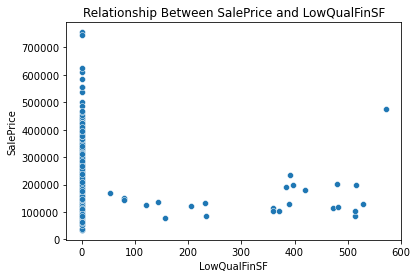

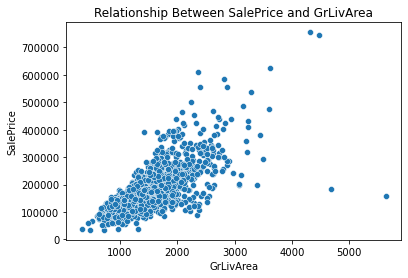

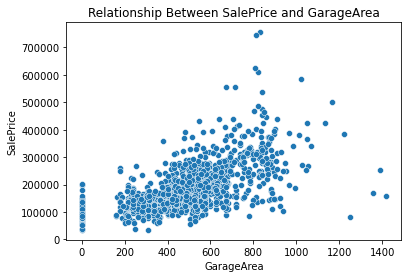

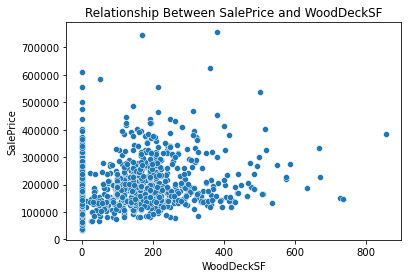

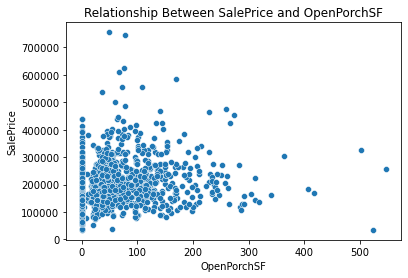

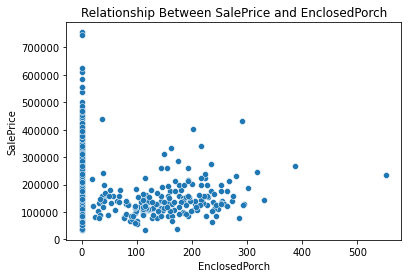

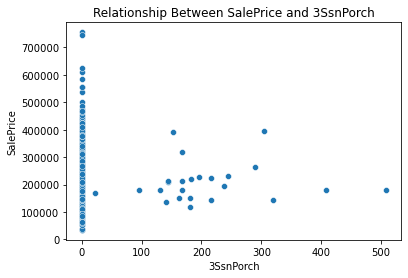

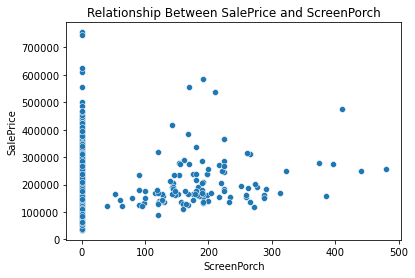

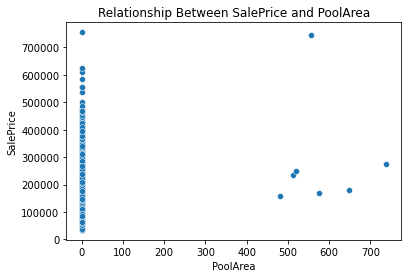

In [204]:
## Relationship Of Numerical Features with Target Variable
for feature in num_feat[:-1]:
    sns.scatterplot(data = df, x=feature, y="SalePrice")
    plt.title("Relationship Between SalePrice and {}".format(feature))
    plt.show()

Barring 1 or 2, none of the numerical features seem to be linearly related with the Target Variable.<br>
Hence, trying to implement Feature Transformation to amend this

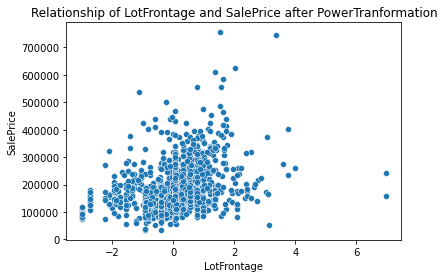

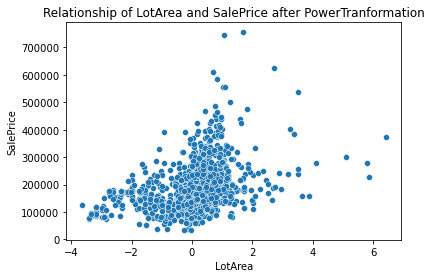

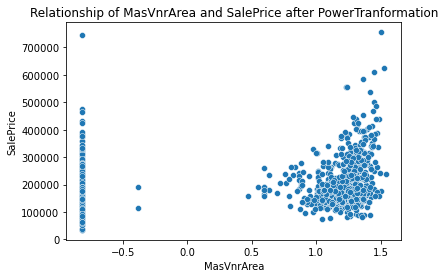

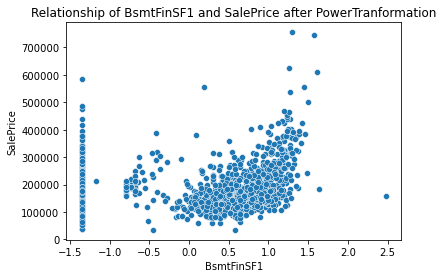

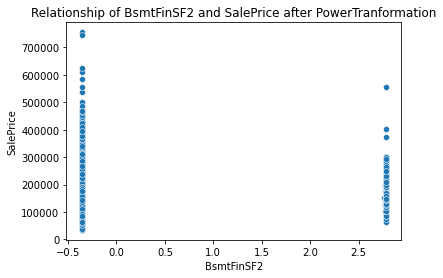

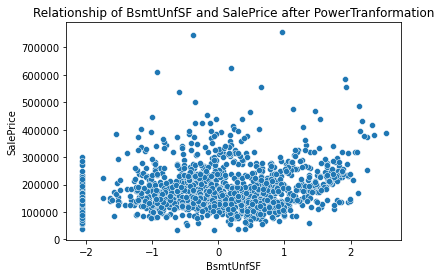

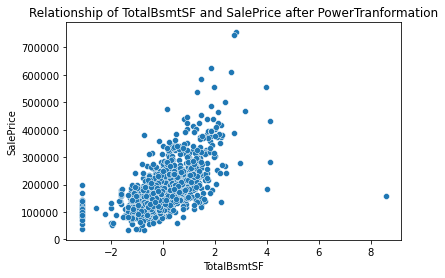

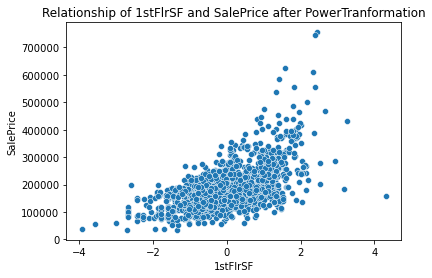

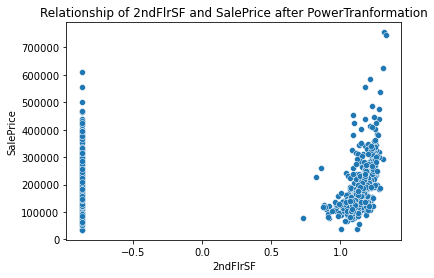

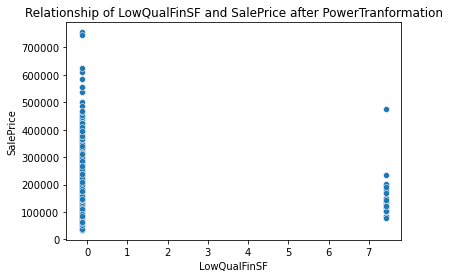

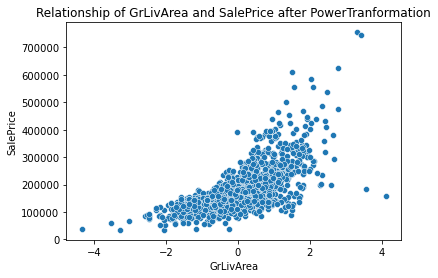

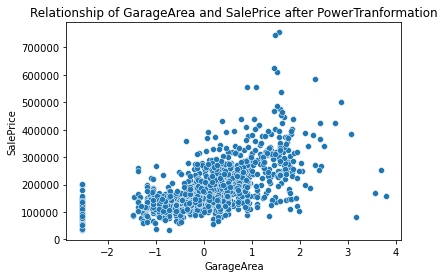

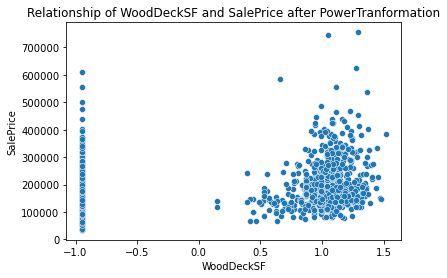

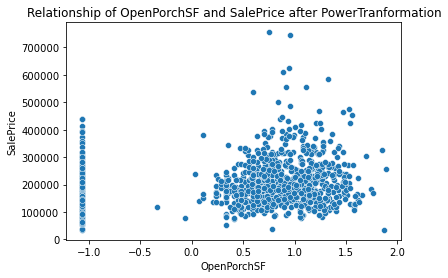

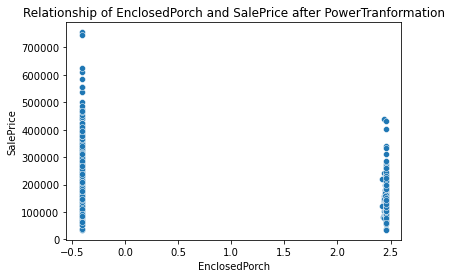

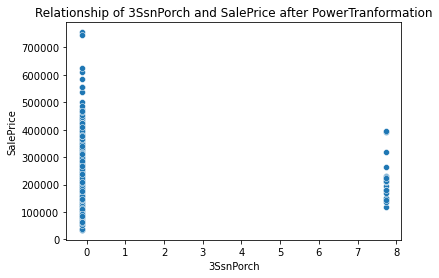

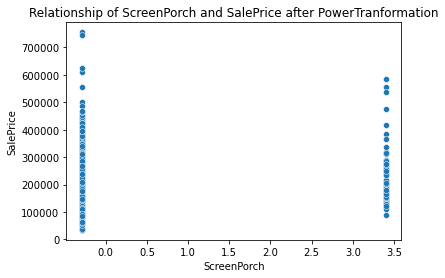

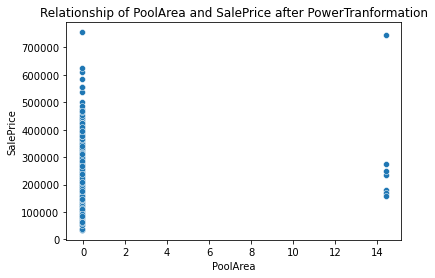

In [205]:
## Creating a pseudo-data out of it and power transforming to see the difference
for feature in num_feat[:-1]:
    data = df.copy()
    power = PowerTransformer()
    data[feature] = power.fit_transform(data[feature].values.reshape(-1,1))
    sns.scatterplot(data = data, x=feature, y="SalePrice")
    plt.title("Relationship of {} and SalePrice after PowerTranformation".format(feature))
    plt.show()

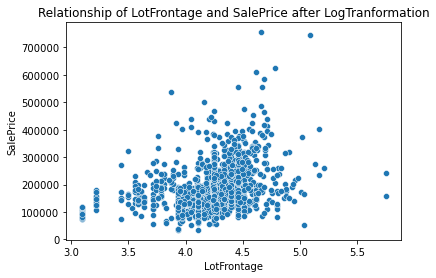

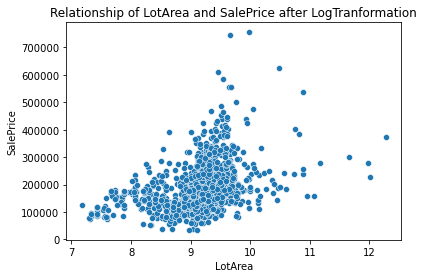

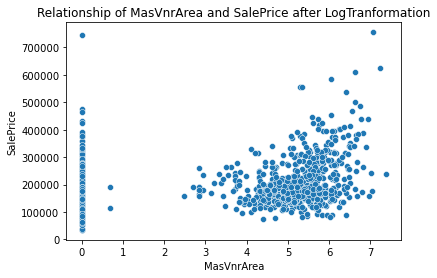

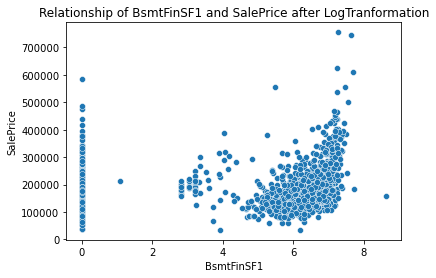

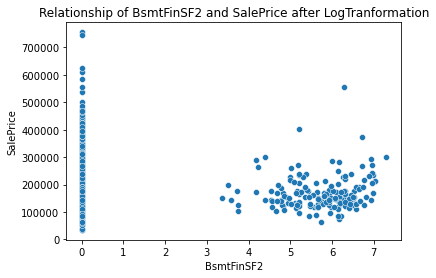

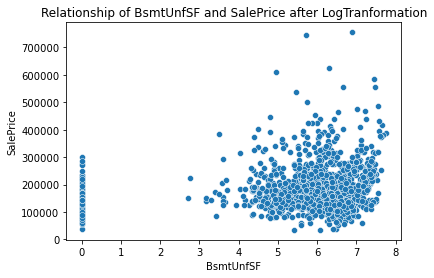

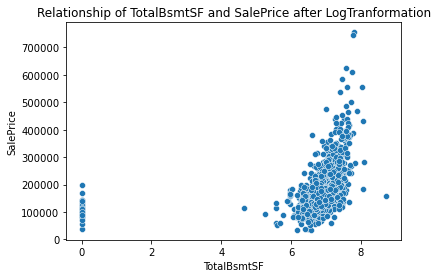

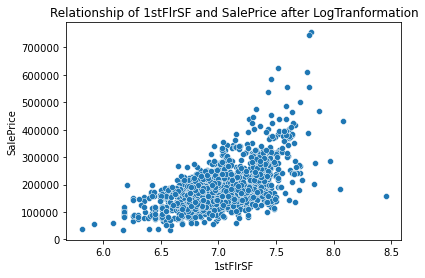

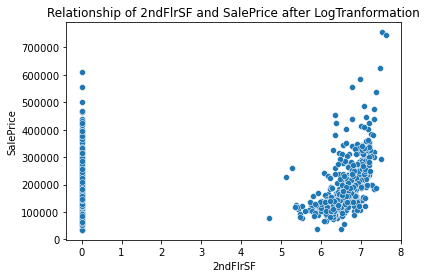

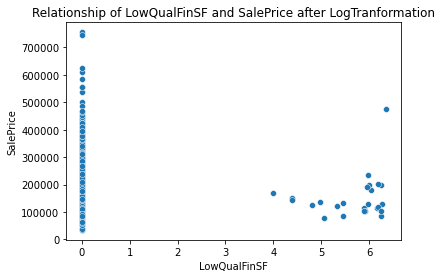

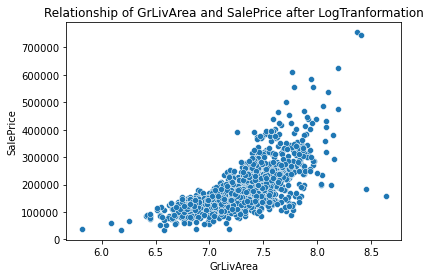

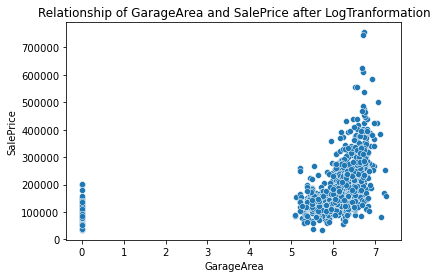

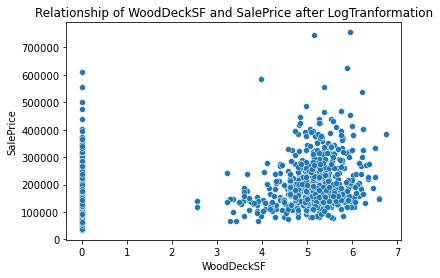

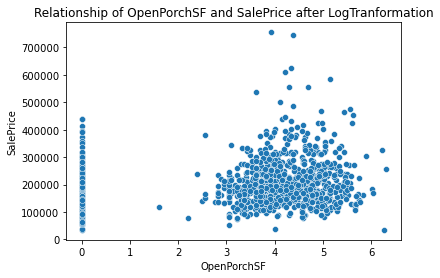

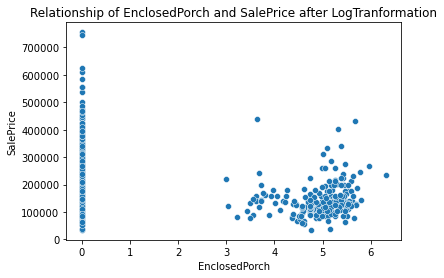

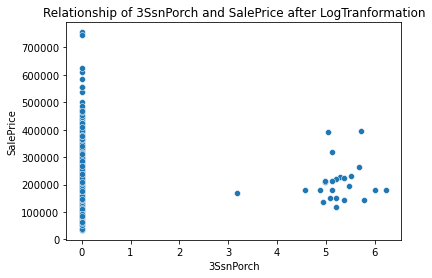

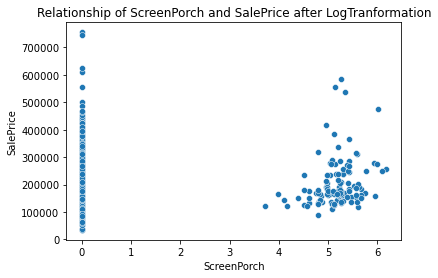

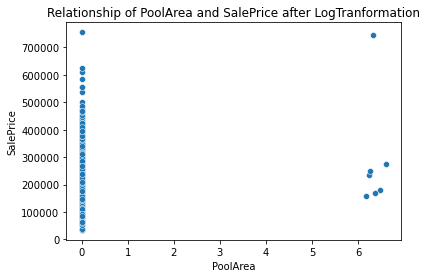

In [206]:
## Same but with Log Transformation to see if there's any difference
for feature in num_feat[:-1]:
    data = df.copy()
    data[feature] = np.log1p(data[feature])
    sns.scatterplot(data = data, x=feature, y="SalePrice")
    plt.title("Relationship of {} and SalePrice after LogTranformation".format(feature))
    plt.show()

#### We'll be using Power Transformation for scaling the Numerical Features as both of the above transformations give similar results

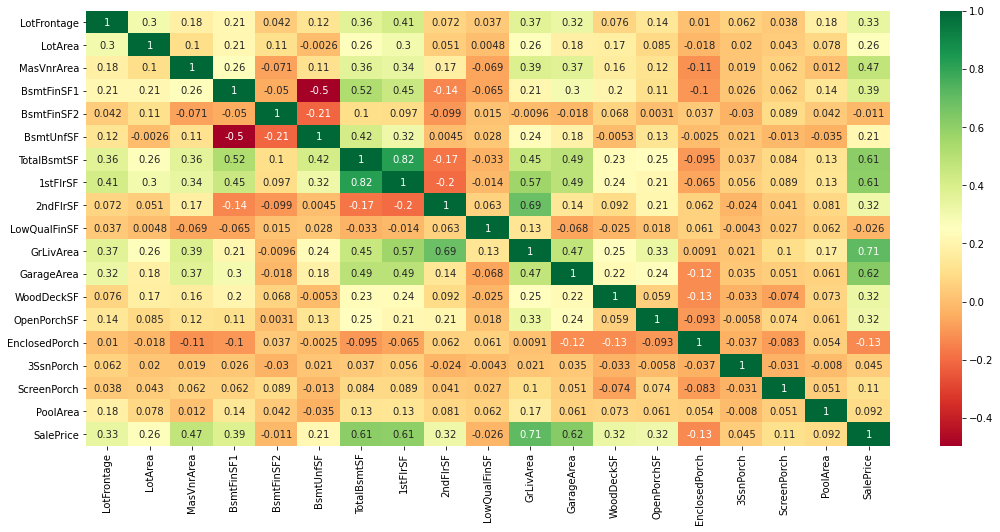

In [207]:
## Correlation Matrix among the Numerical Features to remove highly correlated features
plt.figure(figsize=[18,8])
sns.heatmap(df2[num_feat].corr(),annot=True,cmap='RdYlGn')
plt.show()

No strong Correlations as such barring 1 or 2

## Begining with Modelling

In [208]:
df2.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450          5             5       196.0         706   
1         80.0     9600         31            31         0.0         978   
2         68.0    11250          7             6       162.0         486   
3         60.0     9550         91            36         0.0         216   
4         84.0    14260          8             8       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0       1710          5.0         548           0           61              0   
1       1262         31.0         460         298            0              0   
2       1786          7.0         608           0           42              0   
3       1717          8.0         642           0           35            272   
4       2198          8.0         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  YrSold  SalePrice  MSSubClass_20  \
0          0            0         0    2008     208500              0   
1          0            0         0    2007     181500              1   
2          0            0         0    2008     223500              0   
3          0            0         0    2006     140000              0   
4          0            0         0    2008     250000              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_rare_val  MSZoning_RM  \
0              0              1                    0            0   
1              0              0                    0            0   
2              0              1                    0            0   
3              0              0                    1            0   
4              0              1                    0            0   

   MSZoning_rare_val  Street_rare_val  Alley_rare_val  LotShape_Reg  \
0                  0                0               0             1   
1                  0                0               0             1   
2                  0                0               0             0   
3                  0                0               0             0   
4                  0                0               0             0   

   LotShape_rare_val  LandContour_rare_val  Utilities_rare_val  \
0                  0                     0                   0   
1                  0                     0                   0   
2                  0                     0                   0   
3                  0                     0                   0   
4                  0                     0                   0   

   LotConfig_CulDSac  LotConfig_Inside  LotConfig_rare_val  \
0                  0                 1                   0   
1                  0                 0                   1   
2                  0                 1                   0   
3                  0                 0                   0   
4                  0                 0                   1   

   LandSlope_rare_val  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                   0                     0                     0   
1                   0                     0                     0   
2                   0                     0                     0   
3                   0                     0                     0   
4                   0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NridgHt  \
0                   0                    0                     0   
1     

In [209]:
## X-Y split
X = df2.drop("SalePrice",1)
y = df2["SalePrice"]

## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100) 

In [210]:
print(X_train.shape,X_test.shape)

(1021, 171) (439, 171)


In [211]:
## Power Transforming Numerical Independent Features 
power_scale = PowerTransformer()
X_train[num_feat[:-1]] = power_scale.fit_transform(X_train[num_feat[:-1]])   ## Train Independent Data
X_test[num_feat[:-1]] = power_scale.transform(X_test[num_feat[:-1]])   ## Test Independent Data

## Standard Scaler For Year Features, which are still unscaled
std_scale = StandardScaler()
X_train[year_feat] = std_scale.fit_transform(X_train[year_feat])    ## Train Data
X_test[year_feat] = std_scale.transform(X_test[year_feat])         ## Test Data

## Using another power transformer, to fix Target's right skewness visible in the above DistPlot, to inverse as and when reqd 
power_scale2 = PowerTransformer(method='box-cox')
y_train = pd.DataFrame(power_scale2.fit_transform(y_train.values.reshape(-1,1)))  ## Train Dependent Data
y_test = pd.DataFrame(power_scale2.transform(y_test.values.reshape(-1,1)))        ## Test Dependent Data

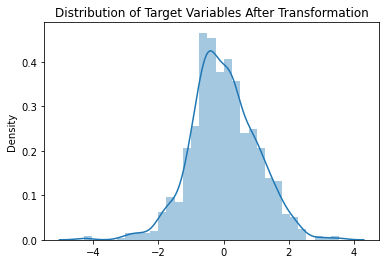

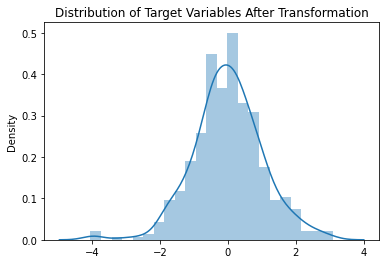

In [212]:
## Checking Target Feature Distribution
for data in [y_train,y_test]:
    sns.distplot(data)
    plt.title("Distribution of Target Variables After Transformation")
    plt.show()

Normally Distributed Target Features....

In [213]:
## CHecking X_train 
X_train.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
318      0.971102  0.173516  -0.675791     -0.332046    1.278999    1.013049   
239     -0.799584 -0.066557   0.939707      1.805650   -0.819843   -0.236216   
986     -0.428956 -1.018137   1.961757     -0.963638   -0.819843   -1.363517   
1416    -0.378057  0.436446   2.917868      1.805650   -0.819843   -1.363517   
390     -0.910537 -0.141939   2.357389      1.708482   -0.819843    0.182975   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
318    -0.363220  -0.196567     0.657548  0.670356  1.248394     -0.141351   
239    -0.363220   0.396446    -0.669601 -1.019648  1.133602     -0.141351   
986    -0.363220   0.090048    -1.296754 -0.301461  1.117357     -0.141351   
1416   -0.363220   0.632062    -0.570578  0.376728  1.212201     -0.141351   
390     2.754204  -0.562662    -0.376864 -0.429465  1.027322     -0.141351   

      GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
318    1.820982    -0.540859    0.854710    1.260484     0.827114   
239    0.115852     1.336579   -1.155235   -0.938208     1.229156   
986    0.401204     1.127975   -0.976620    1.302021    -1.074251   
1416   1.399700     0.418720    0.441692   -0.938208    -1.074251   
390   -0.138740     0.043233   -0.352002   -0.938208     1.193657   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    YrSold  \
318        2.402023  -0.137703    -0.289593 -0.062715  0.882411   
239       -0.416608  -0.137703    -0.289593 -0.062715  1.629460   
986       -0.416608  -0.137703    -0.289593 -0.062715 -1.358737   
1416       2.400807  -0.137703    -0.289593 -0.062715  1.629460   
390        2.400698  -0.137703    -0.289593 -0.062715  0.135361   

      MSSubClass_20  MSSubClass_50  MSSubClass_60  MSSubClass_rare_val  \
318               0              0              1                    0   
239               0              1              0                    0   
986               0              1              0                    0   
1416              0              0              0                    1   
390               0              1              0                    0   

      MSZoning_RM  MSZoning_rare_val  Street_rare_val  Alley_rare_val  \
318             0                  0                0               0   
239             0                  0                0               0   
986             1                  0                0               0   
1416            1                  0                0               0   
390             0                  0                0               1   

      LotShape_Reg  LotShape_rare_val  LandContour_rare_val  \
318              1                  0                     1   
239              1                  0                     0   
986              1                  0                     0   
1416             1                  0                     0   
390              1                  0                     0   

      Utilities_rare_val  LotConfig_CulDSac  LotConfig_Inside  \
318                    0                  0                 1   
239                    0                  0                 1   
986                    0                  0                 0   
1416                   0                  0                 1   
390                    0                  0                 1   

      LotConfig_rare_val  LandSlope_rare_val  Neighborhood_Edwards  \
318                    0                   1                     0   
239                    0                   0                     1   
986                    0                   0                     0   
1416                   0                   0                     0   
390                    0                   0                     1   

      Neighborhood_Gilbert  Neighborhood_NAmes  Neighborhood_NWAmes  \
318                      0                   0                    0   
239                  

In [214]:
## Evaluating Function for Different models
def evaluatemod(estimator,x,y):
    r2 = sklearn.metrics.r2_score(y,estimator.predict(x))
    print("R-Squared is ",round(100*(r2),2),'%')
    print("RMSE is ",round(100*(np.sqrt(sklearn.metrics.mean_squared_error(y,estimator.predict(x)))),2))
    adj_r2 = 1-((1-r2)*(len(x)-1))/(len(x)-len(x.columns)-1)
    print("Adjusted R-Squared is ",round(100*(adj_r2),2),'%')
    
## Assumption Functions
def assump(estimator,x,y):
    res = y.values.reshape(-1,1) - pd.DataFrame(estimator.predict(x))
    sns.distplot(res)
    plt.title("Error Normality Check")
    plt.show()
    print("Z"*120)
    plt.scatter(x=estimator.predict(x), y=res)
    plt.axhline(y=0, color='r', linestyle="--")
    plt.title("Linear Assumptions Check")
    plt.show()
    print("Z"*120)

In [215]:
## BASE MODEL WITH ALL THE FEATURES
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [216]:
## Evaluating Metrics
## Train data
print("On Train Data")
evaluatemod(lr,X_train, y_train)

print("X"*120)

## Test Data
print("On Test Data")
evaluatemod(lr,X_test, y_test)


On Train Data
R-Squared is  92.03 %
RMSE is  28.22
Adjusted R-Squared is  90.43 %
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
On Test Data
R-Squared is  -4.1016482766708214e+21 %
RMSE is  657797050400.12
Adjusted R-Squared is  -6.728546611167863e+21 %


#### The Evaluation Metrics are an ample evidence of textbook Overfitting, with good Train results, but pathetic Test Results
#### Moving onto a little bit of Feature Selection to establish a New and Better BaseLine Model

In [217]:
## Next Linear Model with RFE having 55 features
rfe = RFE(n_features_to_select=55,estimator=lr)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=55)

In [218]:
## Features with RFE SUPPORT
X_rfe = X_train[X_train.columns[rfe.support_]]
X_rfe.columns

Index(['YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'GrLivArea', 'PoolArea',
       'MSSubClass_20', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_rare_val', 'MSZoning_rare_val', 'Neighborhood_Edwards',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Condition1_Norm', 'BldgType_TwnhsE', 'BldgType_rare_val',
       'OverallQual_8', 'OverallCond_7', 'RoofStyle_rare_val',
       'RoofMatl_rare_val', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_rare_val',
       'BsmtExposure_Gd', 'BsmtFinType1_rare_val', 'BsmtFinType2_rare_val',
       'CentralAir_Y', 'Electrical_rare_val', 'BsmtFullBath_rare_val',
       'HalfBath_rare_val', 'KitchenQual_Gd', 'KitchenQual_TA',
       'KitchenQual_rare_val', 'Functional_rare_val', 'Fireplaces_1',
       'Fireplaces_2', 'Fireplaces_rare_val', 'FireplaceQu_Missing',
       'GarageType_Missing', 'GarageType_rare_val', 'GarageFinish_Missing',
       'GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_rare_val',
 

In [219]:
## Linear Model with 55 Features
lr2 = LinearRegression()
lr2.fit(X_rfe,y_train)

LinearRegression()

In [220]:
## Test RFE FEATURES
X_rfe_test = X_test[X_rfe.columns]

## Train data
print("On Train Data")
evaluatemod(lr2,X_rfe, y_train)

print("X"*120)

print("On Test Data")
evaluatemod(lr2,X_rfe_test, y_test)

On Train Data
R-Squared is  88.7 %
RMSE is  33.62
Adjusted R-Squared is  88.06 %
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
On Test Data
R-Squared is  83.82 %
RMSE is  41.32
Adjusted R-Squared is  81.49 %


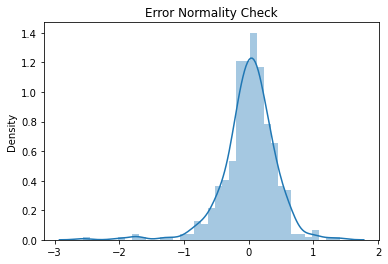

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


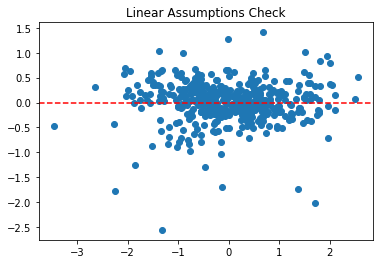

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [221]:
## Assumptions Check on TEST DATA for lr2
assump(lr2,X_rfe_test,y_test)

### This looks much better, the evaluation metrics are commendable with lower variance and lower bias
### Also, the assumptions mostly hold up, aside from a little left skewness of the error terms...

In [222]:
## Checking multi-collinearity levels
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['vif'] = [variance_inflation_factor(X_rfe.values,i) for i in range(X_rfe.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif.sort_values('vif',ascending=False)

Features         vif
54  SaleCondition_Partial         inf
47    GarageQual_rare_val         inf
35           Fireplaces_1         inf
36           Fireplaces_2         inf
37    Fireplaces_rare_val         inf
38    FireplaceQu_Missing         inf
39     GarageType_Missing         inf
41   GarageFinish_Missing         inf
42           GarageCars_1         inf
43           GarageCars_2         inf
44           GarageCars_3         inf
45    GarageCars_rare_val         inf
46          GarageQual_TA         inf
48          GarageCond_TA         inf
49    GarageCond_rare_val         inf
50        PoolQC_rare_val         inf
51            SaleType_WD         inf
4                PoolArea         inf
52      SaleType_rare_val         inf
26  BsmtFinType2_rare_val  1150611.46
2              BsmtFinSF2   955873.62
25  BsmtFinType1_rare_val   256202.41
5           MSSubClass_20       14.06
7           MSSubClass_60       10.81
8     MSSubClass_rare_val       10.57
22            BsmtQual_TA        8.34
32         KitchenQual_TA        8.29
6           MSSubClass_50        6.55
31         KitchenQual_Gd        6.45
0               YearBuilt        5.66
21            BsmtQual_Gd        5.64
23      BsmtQual_rare_val        4.19
15        BldgType_TwnhsE        3.53
13   Neighborhood_Somerst        2.52
3               GrLivArea        2.48
1            YearRemodAdd        2.40
9       MSZoning_rare_val        2.30
33   KitchenQual_rare_val        2.05
16      BldgType_rare_val        2.00
53   SaleCondition_Normal        2.00
27           CentralAir_Y        1.73
20      RoofMatl_rare_val        1.65
12   Neighborhood_OldTown        1.64
19     RoofStyle_rare_val        1.57
11   Neighborhood_NridgHt        1.56
17          OverallQual_8        1.40
24        BsmtExposure_Gd        1.33
28    Electrical_rare_val        1.33
29  BsmtFullBath_rare_val        1.25
18          OverallCond_7        1.23
10   Neighborhood_Edwards        1.20
34    Functional_rare_val        1.17
30      HalfBath_rare_val        1.17
14        Condition1_Norm        1.15
40    GarageType_rare_val        1.14

I get that Multicollinearity between some of the selected 55 features is huge, upto infinity, meaning that some of the variables in the model explain some other variables totally. This can be owed to the fact of dummification of categorical variables which are basically sub-categories of the same feature. Hence, explaining each other, this explains the fact that most of our multicollinear features belong to Categorical Features Framework<br>
Hence, these VIF levels are not showing the entire picture. And as this is a House Price Prediction Problem, several of the multicollinear features are too crucial towards the prediction of a House Price in the practical world like Fireplaces (1 of our Top 5 features), GarageType, SaleCondition etc.<br>
If these Multicollinear features are truly unwanted, our regularization parameter within Lasso will amend this. Moving ON

## Trying if Regularization can improve upon this, using RFE features

In [223]:
## Different values oF ALPHA
params = {
    "alpha":[0.0001,0.001,0.005,0.01,0.05,0.08,0.1,0.3,0.5,0.8,1,2,3,5,8,10,20,50,80,100,150,200,500,750,1000]
}

In [224]:
## Instantiating
ridge = Ridge(random_state=100)

## Trying Cross-Validation to figure out optimum value of alpha
cv = GridSearchCV(estimator=ridge, param_grid=params, n_jobs=-1, cv=10, scoring='neg_mean_absolute_error', verbose=1)

In [225]:
%%time
cv.fit(X_rfe,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Wall time: 6.02 s


GridSearchCV(cv=10, estimator=Ridge(random_state=100), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.08, 0.1,
                                   0.3, 0.5, 0.8, 1, 2, 3, 5, 8, 10, 20, 50, 80,
                                   100, 150, 200, 500, 750, 1000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [226]:
cv.best_estimator_

Ridge(alpha=1, random_state=100)

Alpha for Ridge Regression came out to be 1, suggesting strict regularization

In [227]:
ridge2 = Ridge(alpha=1, random_state=100)
ridge2.fit(X_rfe,y_train)

Ridge(alpha=1, random_state=100)

In [228]:
## Train data
print("On Train Data")
evaluatemod(ridge2,X_rfe, y_train)

print("_"*120)

print("On Test Data")
evaluatemod(ridge2,X_rfe_test, y_test)

On Train Data
R-Squared is  88.67 %
RMSE is  33.66
Adjusted R-Squared is  88.02 %
________________________________________________________________________________________________________________________
On Test Data
R-Squared is  83.82 %
RMSE is  41.31
Adjusted R-Squared is  81.5 %


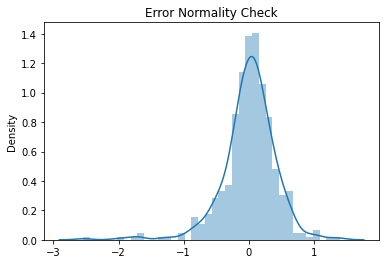

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


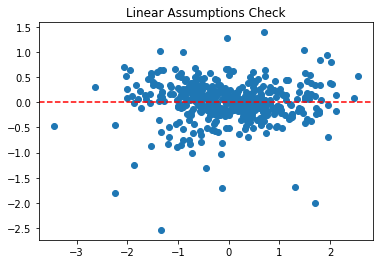

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [229]:
##Assumptions check on TEST DATA
assump(ridge2,X_rfe_test,y_test)

### The Ridge model did help a bit by further reducing the variance of the model as well as its biasness. The model is more comfortable with unseen data now. Also, the assumptions seem to hold up too..
### Let's see if Lasso improves upon this

In [230]:
lasso = Lasso(random_state=100)

cv2 = GridSearchCV(estimator=lasso, param_grid=params, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error', cv=10)

cv2.fit(X_rfe,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=Lasso(random_state=100), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.08, 0.1,
                                   0.3, 0.5, 0.8, 1, 2, 3, 5, 8, 10, 20, 50, 80,
                                   100, 150, 200, 500, 750, 1000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [231]:
cv2.best_estimator_

Lasso(alpha=0.0001, random_state=100)

Alpha came out to be 0.0001 for Lasso, Minimum regularisation

In [232]:
lasso2 = Lasso(alpha=0.0001, random_state=100)
lasso2.fit(X_rfe,y_train)

Lasso(alpha=0.0001, random_state=100)

In [233]:
## Coefficient and intercept, notice some columns' coefficient becomes 0
print(lasso2.intercept_)
print(lasso2.coef_)

[0.11200962]
[-0.13136526 -0.10754891  0.02090864  0.51899233 -0.02596609 -0.22083383
 -0.44191922 -0.46127585 -0.32393418 -0.19448203 -0.22590144  0.14583588
 -0.20936299  0.30583539  0.14335812 -0.30521724 -0.3298234   0.17771974
  0.13085611  0.14853615 -0.06036833 -0.19159544 -0.27999712 -0.27439429
  0.25886229 -0.29362099 -0.          0.27290004  0.13852522  0.37731325
 -0.35767159 -0.24776445 -0.31466902 -0.40248899 -0.34525455  0.05148544
  0.31363083 -0.51457795 -0.03514412 -0.12270046 -0.1943436  -0.00443523
 -0.08669711  0.          0.16929416  0.39754017 -0.          0.04111709
  0.16921977 -0.         -0.         -0.00545244  0.          0.19335049
  0.15539558]


In [234]:
## Train data
print("On Train Data")
evaluatemod(lasso2,X_rfe, y_train)

print("X"*120)

print("On Test Data")
evaluatemod(lasso2,X_rfe_test, y_test)

On Train Data
R-Squared is  88.69 %
RMSE is  33.63
Adjusted R-Squared is  88.05 %
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
On Test Data
R-Squared is  83.81 %
RMSE is  41.33
Adjusted R-Squared is  81.48 %


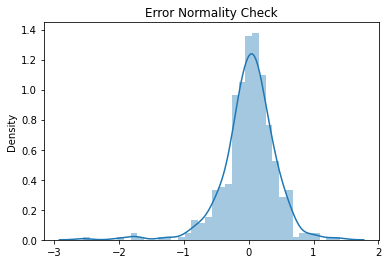

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


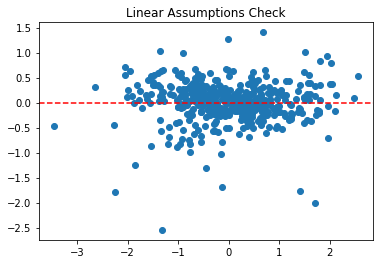

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [235]:
## Assumptions Check on TEST DATA
assump(lasso2,X_rfe_test,y_test)

## Lasso chose an alpha of least regularization, proving that our RFE BaseLine model was very close with its model coefficients. 
## The Metrics show a decline in Variance with low Bias TradeOff.
## The assumptions also hold up true..

In [236]:
## Coefficients' Dataframe to sort values as per our convinience
las_coef = pd.DataFrame({'Features':X_rfe.columns,'Coefficients':list(lasso2.coef_)})
las_coef['Coefficients'] = round(las_coef['Coefficients'],3) 
las_coef.sort_values(by='Coefficients', ascending=False).head(10)  ## Top 10 Positively affecting Features

Features  Coefficients
3               GrLivArea         0.519
45    GarageCars_rare_val         0.398
29  BsmtFullBath_rare_val         0.377
36           Fireplaces_2         0.314
13   Neighborhood_Somerst         0.306
27           CentralAir_Y         0.273
24        BsmtExposure_Gd         0.259
53   SaleCondition_Normal         0.193
17          OverallQual_8         0.178
48          GarageCond_TA         0.169

In [237]:
## Top 10 Negatively impacting Features
las_coef.sort_values('Coefficients').head(10)

Features  Coefficients
37   Fireplaces_rare_val        -0.515
7          MSSubClass_60        -0.461
6          MSSubClass_50        -0.442
33  KitchenQual_rare_val        -0.402
30     HalfBath_rare_val        -0.358
34   Functional_rare_val        -0.345
16     BldgType_rare_val        -0.330
8    MSSubClass_rare_val        -0.324
32        KitchenQual_TA        -0.315
15       BldgType_TwnhsE        -0.305

In [238]:
## Checking How many of these coefficients are 0
las_coef[las_coef['Coefficients']==0].shape

(6, 2)

Turns Out, Lasso pushed 6 of our 55 features to 0, leaving only 49 features in the Final Model

### As our final model for prediction, I'll be choosing Lasso for the reasons mentioned in the Answers sheet..<br>
#### Making predictions on the test set

In [239]:
## Making predictions
y_pred = lasso2.predict(X_rfe_test)

## Reversing back to Original Scale
y_pred = power_scale2.inverse_transform(y_pred.reshape(-1,1))

In [240]:
## Final Prices of our Test Set
pd.DataFrame(np.round(y_pred,2))

0
0    119014.32
1    200782.51
2    176134.37
3    207164.87
4    116500.62
5    218484.72
6    209274.07
7    289010.87
8     99146.28
9    170815.31
10   195566.23
11   166273.86
12   151990.44
13   292988.81
14   107785.60
15   138213.03
16   181685.19
17    98853.26
18   135598.80
19   105490.51
20   174379.92
21   118384.34
22   148813.67
23   116216.81
24   192628.12
25   119117.83
26    46104.56
27    89708.73
28   203152.19
29   146744.29
30   160914.04
31   237284.34
32   229039.70
33    97625.64
34   124041.89
35    80042.34
36   114804.11
37   103857.45
38   165244.49
39   135488.52
40   319749.91
41   195967.00
42   127301.35
43    99044.64
44   152851.47
45    70760.31
46   230669.23
47   124419.39
48   158132.81
49    94596.81
50   226396.66
51    96195.45
52   344559.30
53   273455.00
54   159537.69
55   104526.48
56    70329.37
57   191125.64
58   130323.95
59   385355.59
60   134954.40
61   259689.35
62   156966.64
63   160013.28
64   213379.02
65   212912.37
66   113587.15
67   154196.21
68   196264.17
69   147973.49
70   221388.92
71   290752.38
72   241527.42
73   122171.19
74   222556.98
75   163932.09
76   148129.13
77   253647.02
78   179825.50
79   200668.12
80    99965.85
81   216968.71
82   161494.44
83   190790.78
84   379970.42
85    97990.73
86   127306.86
87   178421.16
88   173038.81
89   130158.69
90   140600.77
91   134418.63
92   211330.36
93   159100.17
94   311661.18
95    61338.75
96   207694.85
97   217348.65
98   135792.89
99   206587.22
100  128484.81
101  112529.87
102  220404.79
103  273219.74
104  154949.61
105  137616.27
106  169630.91
107  123469.57
108  122901.99
109  115395.60
110  238277.97
111   99656.93
112  165578.00
113   98085.57
114  178779.26
115  151023.21
116  119587.96
117  172027.74
118  180739.08
119  190349.11
120  128063.33
121  140697.87
122  173466.72
123  126886.28
124  125048.48
125  148301.49
126  155895.22
127  201129.68
128  396555.87
129  191946.30
130  119739.94
131   81043.33
132  307162.44
133  199003.42
134  115119.65
135  110362.64
136  134664.64
137  175192.69
138  299458.41
139  100696.49
140  161068.43
141  178727.53
142  150844.81
143  210969.90
144  319636.29
145  138740.58
146  152041.36
147  188506.75
148  346897.49
149  182468.44
150  112054.38
151  198194.10
152  155604.66
153  306072.02
154  181489.02
155  128324.44
156   81281.78
157  181060.18
158  192648.68
159  227746.32
160  206424.66
161  127518.69
162  170334.64
163  116285.85
164  121872.81
165  113394.05
166  220920.09
167  176897.52
168  332109.24
169  157166.50
170  164169.97
171  186266.82
172  133983.80
173  203177.17
174  131232.34
175  132018.32
176  243655.59
177  213013.58
178  116485.71
179  133548.49
180  134836.93
181  371876.19
182  111736.78
183   84730.88
184  164902.07
185  118019.06
186  163634.38
187  211973.89
188  201557.59
189  133412.58
190  228440.72
191  186997.08
192  161959.09
193  245282.50
194  332608.91
195   82516.26
196  155831.81
197  142069.62
198  230276.19
199  198999.51
200  202180.21
201  214946.13
202  124007.17
203  113860.72
204  177394.21
205  127601.10
206  236213.66
207  147689.34
208  154644.73
209  189995.12
210  131480.97
211   93677.82
212  396296.20
213  190370.66
214  140110.32
215  289442.00
216  133464.55
217  105278.52
218  190362.79
219  181695.32
220  160759.76
221  127495.77
222  115899.20
223  109483.35
224  218702.43
225  212904.57
226  222697.73
227  112360.60
228  127526.11
229  114654.69
230  272728.52
231  104530.03
232  259982.92
233  253095.82
234  189798.26
235  368759.51
236  178389.46
237  304239.48
238  150281.68
239  143713.10
240  188946.12
241  226404.87
242  224223.81
243  187314.57
244   78835.56
245  182992.29
246  256686.70
247  220618.28
248  201840.67
249  200202.45
250  244508.97
251  133733.55
252  188972.91
253  313171.12
254  135968.98
255   85504.64
256  190524.72
257  191156.19
258  161117.30
259  127201.30
260  112476.16
261  337097.23
262  143793.55
263   97607.94
264  304440.51
265  164599.05
266  208

# THE END